In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from sklearn.linear_model import LinearRegression
plt.style.use('classic')
from sklearn.model_selection import train_test_split

## Reading The Dataset ##

In [2]:
df = pd.read_excel('C:/Users/000K1G744/Desktop/Incident management/IKS_Inc.xlsx', sheet_name='Sheet1')

## Removing the cancelled State ##

In [3]:
dataframe = df[df['state']!= 'Cancelled']

In [4]:
dataframe['business_duration'].unique()

array([nan, '1 Day 8 Hours', '7 Days 16 Hours', ...,
       '2 Days 21 Hours 27 Minutes', '9 Days 3 Hours 42 Minutes',
       '11 Days 19 Hours 30 Minutes'], dtype=object)

## Removing the Columns Which is having 90% or more mising values or columns which have no relevant contribution ##

In [5]:
## Dropping the columns which is more than 90% missing value ##
dataframe = dataframe.drop(['due_date','additional_assignee_list','order','u_external_user_name','u_qs_actual_start','u_qs_affected_date','hold_reason','u_lan_boh_time_spent','u_billing_type','sn_esign_document','u_sc_escalation_count','u_squad','u_external_user_email','group_list','u_qs_duplicate_of','universal_request','correlation_id','correlation_display','u_response_sla_criteria','u_resolve_sla_criteria','u_billing_count','user_input','time_worked','u_location_of_business_supported','sn_esign_esignature_configuration','u_external_user_location','u_reason_for_cancelling','expected_start','u_resolved_by_group','approval_history','skills','follow_up','u_known_error_problem','end','route_reason','u_qs_resolver_group','rfc','sys_tags','u_integration_transfer_group','u_ntt_status_code','caused_by','parent','u_mio_invoked_date','u_esc_acknowledgement2','u_escalation_l2_timestamp','u_esc_acknowledgement1','u_escalation_l1_timestamp','u_escalation_count','u_escalation_date','u_on_hold_reason','u_ntt_time_spent','u_sla_target','u_qs_processmanagergroup','u_qs_processmanager','problem_id','u_qs_reopened_at','reopened_time','reopened_by','watch_list','closed_by','parent_incident'],axis=1)

In [6]:
dataframe = dataframe.drop(['comments','description','short_description','close_notes'],axis=1)

In [7]:
dataframe = dataframe.drop(['u_qs_contact_number'],axis=1)

In [8]:
dataframe = dataframe.drop(['_id'],axis=1)

In [9]:
## Checking the missing value percentage ##
percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
missing_value = pd.DataFrame({'column_name': dataframe.columns,
                                 'percent_missing': percent_missing})

In [10]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100000)

In [11]:
missing_value['percent_missing'].sort_values(ascending=False)

company                       78.242903
u_qs_opened_by_group          68.535924
subcategory                   32.542465
assigned_to                   28.726116
u_location_details            28.509554
service_offering              28.194287
business_service              28.194287
category                      27.042237
location                      25.586706
u_warranty_expired            10.521664
u_end_of_support              10.520927
cmdb_ci                       10.478204
work_end                       8.126961
work_start                     4.802664
u_cause                        1.386290
resolved_by                    0.657788
closed_at                      0.603279
create_closed_days             0.603279
month_year_closed              0.603279
year_of_closed                 0.603279
open_closed_seconds            0.603279
open_closed_age                0.603279
hour_of_day_closed             0.603279
day_of_week_closed             0.603279
day_of_month_closed            0.603279


## Missing Value Imputation ##

In [12]:
dataframe['company'] = dataframe['company'].fillna("Unknown")
dataframe['u_qs_opened_by_group'] = dataframe['u_qs_opened_by_group'].fillna("No Group")
dataframe['subcategory'] = dataframe['subcategory'].fillna("No Category")
dataframe['assigned_to'] = dataframe['assigned_to'].fillna("Non_Assigned")
dataframe['u_location_details'] = dataframe['u_location_details'].fillna("No Location")
dataframe['business_service'] = dataframe['business_service'].fillna("No Business")
dataframe['service_offering'] = dataframe['service_offering'].fillna("No Service")
dataframe['category'] = dataframe['category'].fillna("No Category")
dataframe['category'] = dataframe['category'].fillna("No Category")
dataframe['location'] = dataframe['location'].fillna("location")
dataframe['u_warranty_expired'] = dataframe['u_warranty_expired'].fillna("No Warranty")
dataframe['cmdb_ci'] = dataframe['cmdb_ci'].fillna("Unknown")
dataframe['work_end'] = dataframe['work_end'].fillna("2021-06-27 16:00:19")
dataframe['work_start'] = dataframe['work_start'].fillna("2021-03-01 13:26:05")
dataframe['u_cause'] = dataframe['u_cause'].fillna("No Cause")
dataframe['resolved_by'] = dataframe['resolved_by'].fillna("No Resolved")
dataframe['open_closed_age'] = dataframe['open_closed_age'].fillna("No age")
dataframe['closed_at'] = dataframe['closed_at'].fillna("2021-06-04 17:00:13")
dataframe['create_closed_age'] = dataframe['create_closed_age'].fillna("No Closed")
dataframe['day_of_week_closed'] = dataframe['day_of_week_closed'].fillna("Unknown")
dataframe['month_year_closed'] = dataframe['month_year_closed'].fillna("Jul 2021")
dataframe['close_code'] = dataframe['close_code'].fillna("Unknown")
dataframe['day_of_week_resolved'] = dataframe['day_of_week_resolved'].fillna("Unknown")
dataframe['create_resolved_age'] = dataframe['create_resolved_age'].fillna("Unknown")
dataframe['resolved_at'] = dataframe['resolved_at'].fillna("2021-05-30 04:46:16")
dataframe['month_year_resolved'] = dataframe['month_year_resolved'].fillna("Jul 2021")
dataframe['open_resolved_age'] = dataframe['open_resolved_age'].fillna("Unknown")
dataframe['calendar_duration'] = dataframe['calendar_duration'].fillna("Unknown")
dataframe['business_stc'] = pd.to_numeric(dataframe['business_stc'],errors = 'coerce')
dataframe['calendar_stc'] = pd.to_numeric(dataframe['calendar_stc'],errors = 'coerce')
dataframe['year_of_closed'] = dataframe['year_of_closed'].fillna(dataframe['year_of_closed'].mode()[0])
dataframe['month_of_closed'] = dataframe['month_of_closed'].fillna(dataframe['month_of_closed'].mode()[0])
dataframe['create_closed_days'] = dataframe['create_closed_days'].fillna(dataframe['create_closed_days'].mean())
dataframe['create_closed_days'] = dataframe['create_closed_days'].fillna(dataframe['create_closed_days'].mean())
dataframe['open_closed_days'] = dataframe['open_closed_days'].fillna(dataframe['open_closed_days'].mean())
dataframe['create_closed_seconds'] = dataframe['create_closed_seconds'].fillna(dataframe['create_closed_seconds'].mean())
dataframe['open_closed_seconds'] = dataframe['open_closed_seconds'].fillna(dataframe['open_closed_seconds'].mean())
dataframe['hour_of_day_closed'] = dataframe['hour_of_day_closed'].fillna(dataframe['hour_of_day_closed'].mode()[0])
dataframe['day_of_month_closed'] = dataframe['day_of_month_closed'].fillna(dataframe['day_of_month_closed'].mode()[0])
dataframe['day_of_month_resolved'] = dataframe['day_of_month_resolved'].fillna(dataframe['day_of_month_resolved'].mode()[0])
dataframe['month_of_resolved'] = dataframe['month_of_resolved'].fillna(dataframe['month_of_resolved'].mode()[0])
dataframe['year_of_resolved'] = dataframe['year_of_resolved'].fillna(dataframe['year_of_resolved'].mode()[0])
dataframe['open_resolved_seconds'] = dataframe['open_resolved_seconds'].fillna(dataframe['open_resolved_seconds'].mean())
dataframe['create_resolved_seconds'] = dataframe['create_resolved_seconds'].fillna(dataframe['create_resolved_seconds'].mean())
dataframe['open_resolved_days'] = dataframe['open_resolved_days'].fillna(dataframe['open_resolved_days'].mode()[0])
dataframe['create_resolved_days'] = dataframe['create_resolved_days'].fillna(dataframe['create_resolved_days'].mode()[0])
dataframe['business_duration'] =  dataframe['business_duration'].fillna("Unknown")   
dataframe['business_duration_mins'] = dataframe['business_duration_mins'].fillna(dataframe['business_duration_mins'].mean())
dataframe['calendar_duration_mins'] = dataframe['calendar_duration_mins'].fillna(dataframe['calendar_duration_mins'].mean())
dataframe['calendar_stc'] = dataframe['calendar_stc'].fillna(dataframe['calendar_stc'].mode()[0])
dataframe['business_stc'] = dataframe['business_stc'].fillna(dataframe['business_stc'].mode()[0])
dataframe['u_end_of_support'] = dataframe['u_end_of_support'].fillna("No Support")
dataframe['child_incidents'] = pd.to_numeric(dataframe['child_incidents'],errors='coerce').fillna(0)
dataframe['sys_mod_count'] = pd.to_numeric(dataframe['sys_mod_count'],errors='coerce').fillna(0)

## Converting the datetime object to datetime data type ##

In [13]:
dataframe['opened_at'] = pd.to_datetime(dataframe['opened_at'])
dataframe['resolved_at'] = pd.to_datetime(dataframe['resolved_at'])
dataframe['work_end'] = pd.to_datetime(dataframe['work_end'])
dataframe['work_start']= pd.to_datetime(dataframe['work_start'])
dataframe['closed_at'] = pd.to_datetime(dataframe['closed_at'])

## Segregating the datasets into four subsets based on their priority ##

In [14]:
dataframe_p1 = dataframe[dataframe['priority'] == 'P1 - Critical']
dataframe_p2 = dataframe[dataframe['priority'] == 'P2 - High']
dataframe_p3 = dataframe[dataframe['priority'] == 'P3 - Medium']
dataframe_p4 = dataframe[dataframe['priority'] == 'P4 - Low']

## MTTR Calculation ##

In [15]:
import datetime
ct = datetime.datetime.now()
from datetime import datetime
now = datetime.now()
today = pd.to_datetime("now")

In [16]:
dataframe_p1['diff_seconds'] = ((dataframe_p1['resolved_at'] - dataframe_p1['opened_at'])/np.timedelta64(1,'h'))
dataframe_p2['diff_seconds'] = ((dataframe_p2['resolved_at'] - dataframe_p2['opened_at'])/np.timedelta64(1,'h'))
dataframe_p3['diff_seconds'] = ((dataframe_p3['resolved_at'] - dataframe_p3['opened_at'])/np.timedelta64(1,'h'))
dataframe_p4['diff_seconds'] = ((dataframe_p4['resolved_at'] - dataframe_p4['opened_at'])/np.timedelta64(1,'h'))
dataframe_p1['diff_seconds_1'] = ((today - dataframe_p1['opened_at']) / np.timedelta64(1,'h'))
dataframe_p2['diff_seconds_1'] = ((today - dataframe_p2['opened_at']) / np.timedelta64(1,'h'))
dataframe_p3['diff_seconds_1'] = ((today - dataframe_p3['opened_at']) / np.timedelta64(1,'h'))
dataframe_p4['diff_seconds_1'] = ((today - dataframe_p4['opened_at']) / np.timedelta64(1,'h'))

C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_19856/3422141719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_p1['diff_seconds'] = ((dataframe_p1['resolved_at'] - dataframe_p1['opened_at'])/np.timedelta64(1,'h'))
C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_19856/3422141719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_p2['diff_seconds'] = ((dataframe_p2['resolved_at'] - dataframe_p2['opened_at'])/np.timedelta64(1,'h'))
C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_19856/3

In [17]:
def derived_column(dataframe_p1):
    if dataframe_p1['state'] == 'Resolved':
        return dataframe_p1.diff_seconds
    elif dataframe_p1['state'] == 'Closed':
        return dataframe_p1.diff_seconds
    elif dataframe_p1['state'] == 'In Progress':
        return dataframe_p1.diff_seconds_1
    elif dataframe_p1['state'] == 'SLA Hold':
        return dataframe_p1.diff_seconds_1
    else:
        return dataframe_p1.diff_seconds_1

In [18]:
dataframe_p1['MTTR'] = dataframe_p1.apply(derived_column,axis=1)

C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_19856/2341855210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_p1['MTTR'] = dataframe_p1.apply(derived_column,axis=1)


In [19]:
dataframe_p2['MTTR'] = dataframe_p2.apply(derived_column,axis=1)
dataframe_p3['MTTR'] = dataframe_p3.apply(derived_column,axis=1)
dataframe_p4['MTTR'] = dataframe_p4.apply(derived_column,axis=1)

C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_19856/4119333658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_p2['MTTR'] = dataframe_p2.apply(derived_column,axis=1)
C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_19856/4119333658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_p3['MTTR'] = dataframe_p3.apply(derived_column,axis=1)
C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_19856/4119333658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

## Deleting Redundant Columns ##


In [20]:
dataframe_p1=dataframe_p1.drop(['number','sys_created_by','task_effective_number','sys_updated_by','opened_by','sys_created_on','caller_id','u_qs_reported_by','sys_id','activity_due','xtracted_on','diff_seconds','diff_seconds_1','sys_updated_on','opened_at','resolved_at','work_end','work_start','closed_at'],axis=1)

In [21]:
cat_columns = list(dataframe_p1.select_dtypes(['object']).columns)

In [22]:
cat_columns

['_index',
 '_type',
 'upon_reject',
 'u_end_of_support',
 'u_qs_opened_by_group',
 'u_warranty_expired',
 'state',
 'cmdb_ci',
 'impact',
 'priority',
 'sys_domain_path',
 'business_duration',
 'u_qs_type',
 'notify',
 'service_offering',
 'sys_class_name',
 'assigned_to',
 'sla_due',
 'u_escalation',
 'escalation',
 'upon_approval',
 'u_sc_escalation',
 'u_location_details',
 'resolved_by',
 'sys_domain',
 'business_service',
 'subcategory',
 'close_code',
 'assignment_group',
 'calendar_duration',
 'contact_type',
 'incident_state',
 'urgency',
 'u_preferred_language',
 'company',
 'severity',
 'approval',
 'u_cause',
 'location',
 'category',
 'account_prefix',
 'account_name',
 'account_domain',
 'open_lastupdated_age',
 'create_lastupdated_age',
 'open_extracted_age',
 'create_extracted_age',
 'day_of_week_created',
 'month_year_created',
 'day_of_week_opened',
 'month_year_opened',
 'day_of_week_resolved',
 'month_year_resolved',
 'day_of_week_closed',
 'month_year_closed',
 're

In [23]:
import seaborn as sns

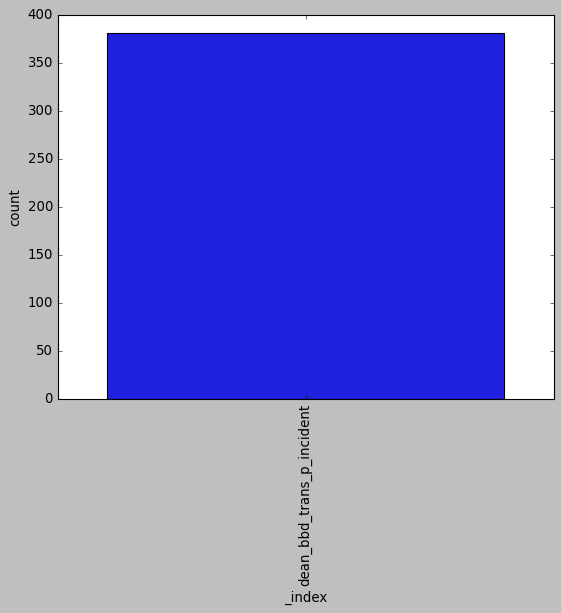

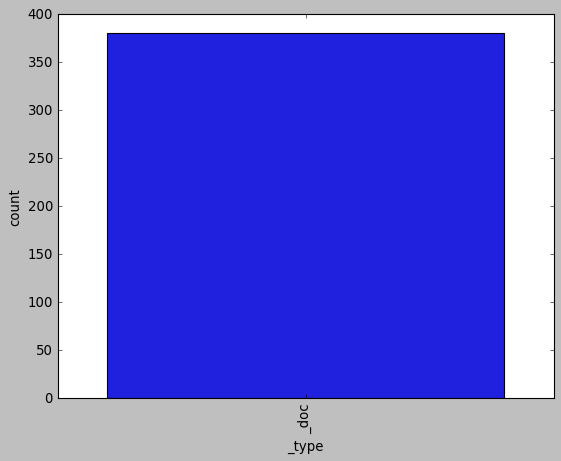

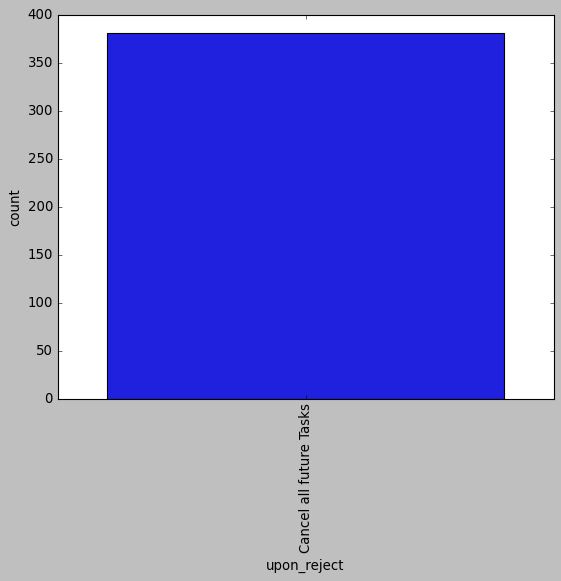

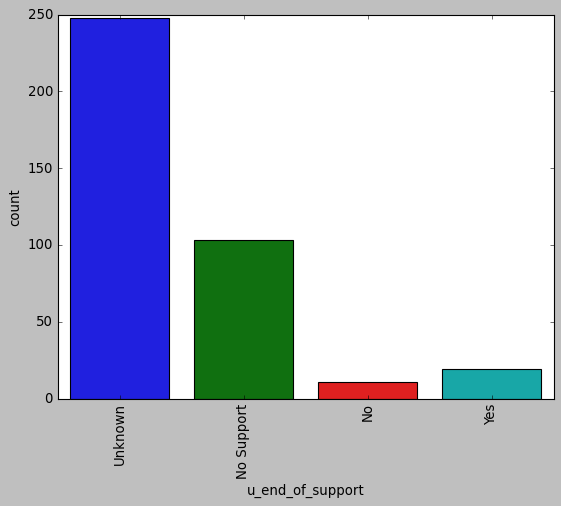

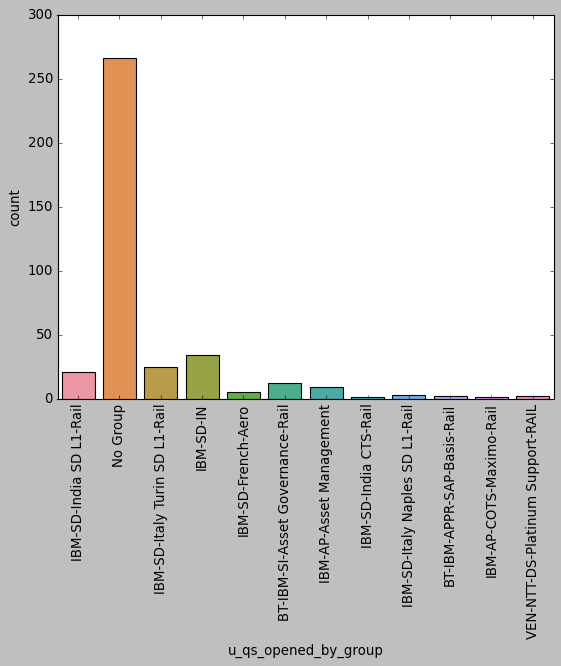

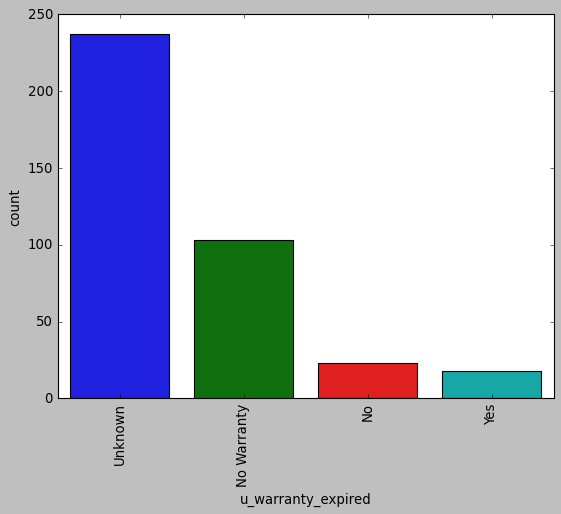

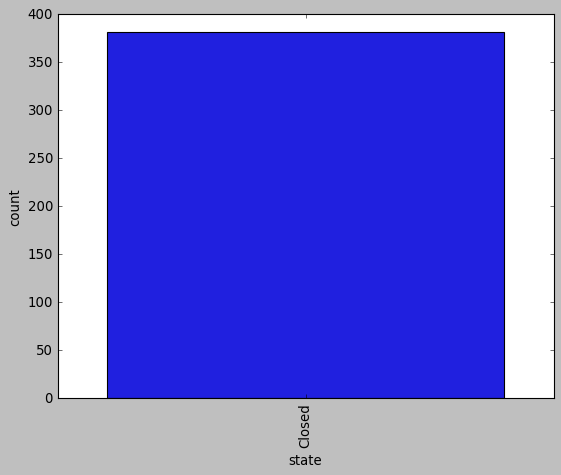

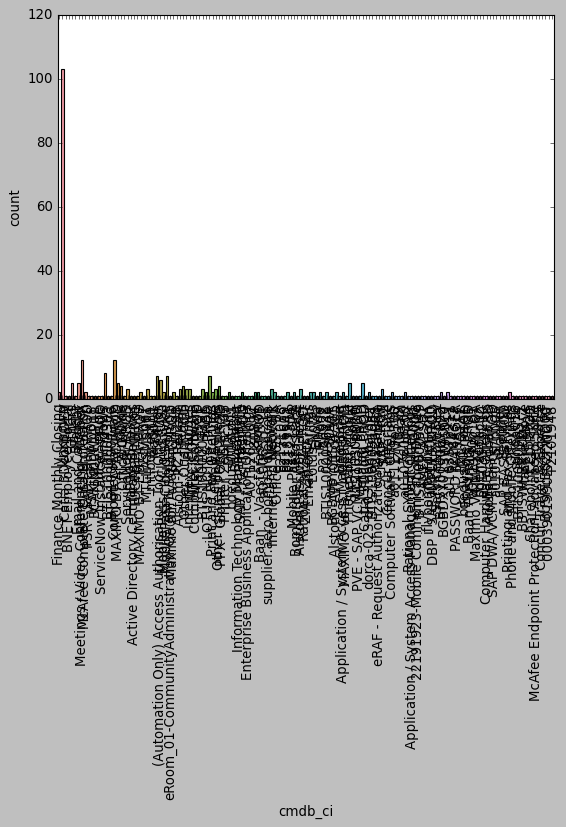

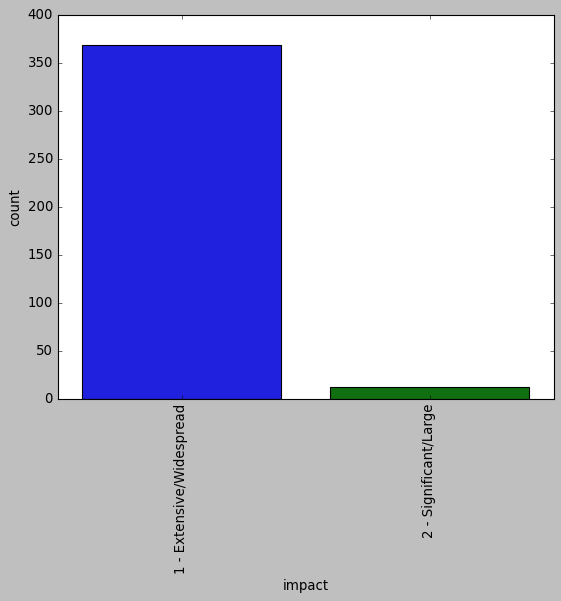

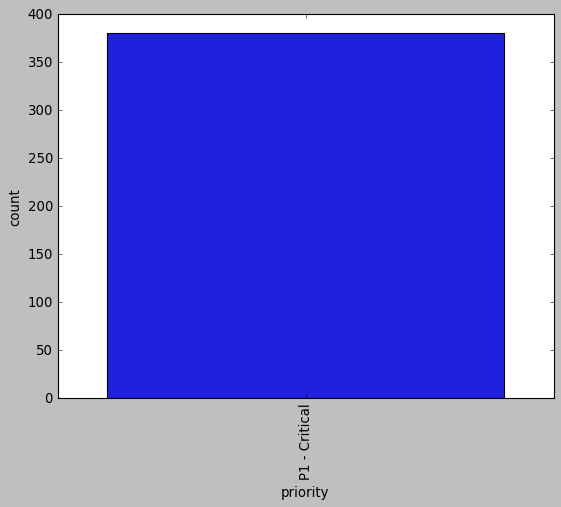

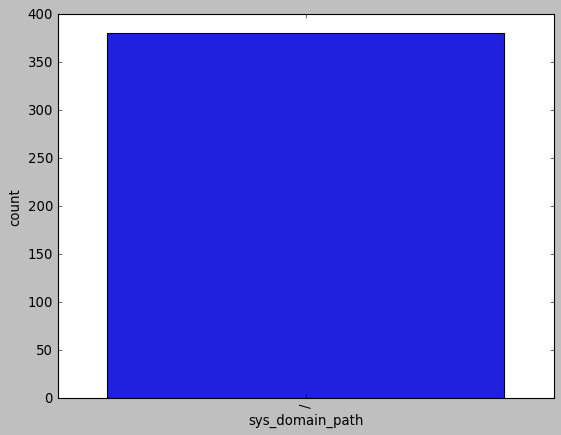

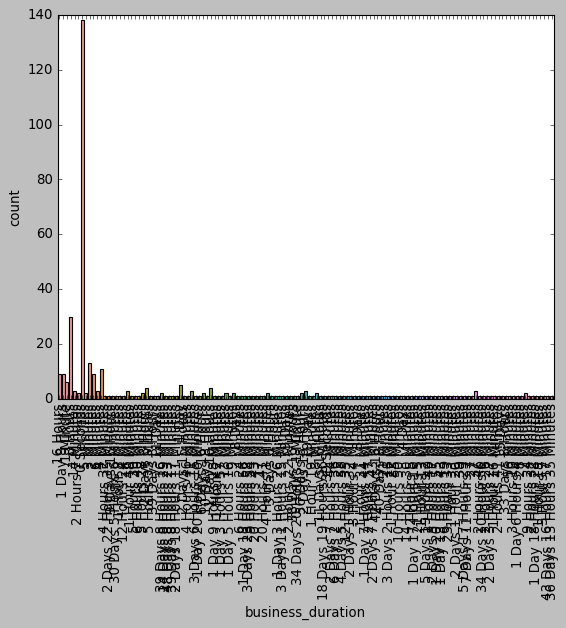

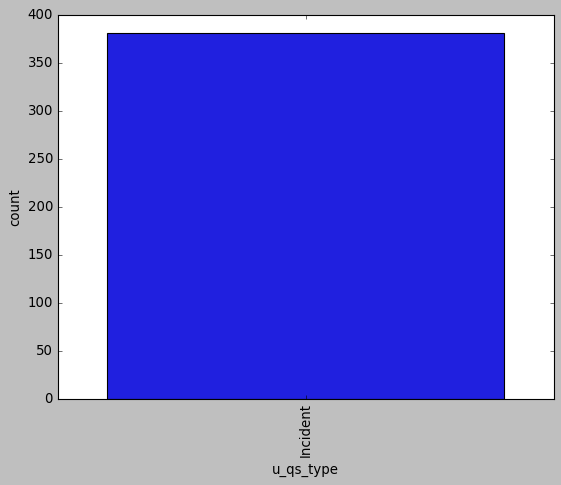

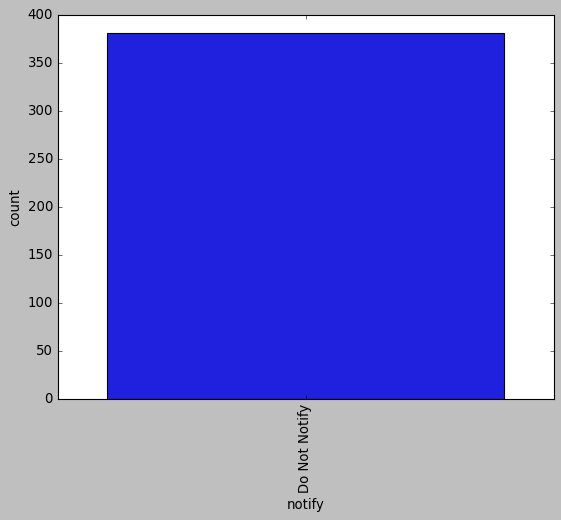

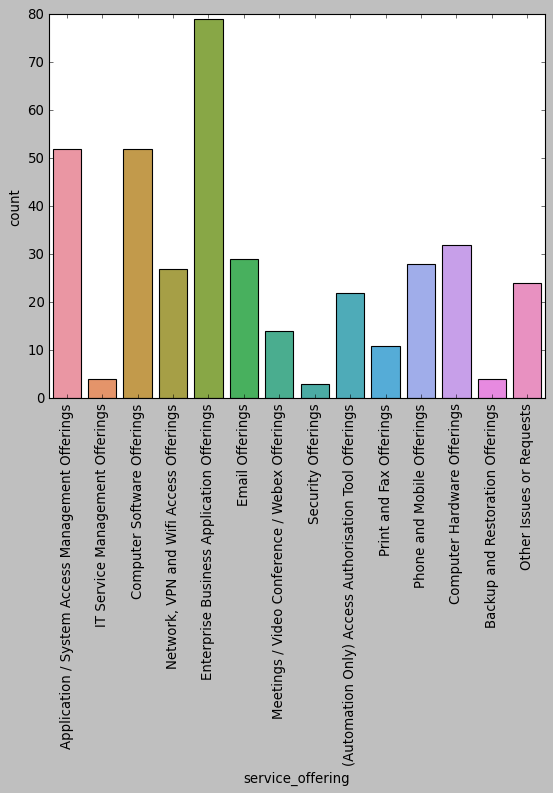

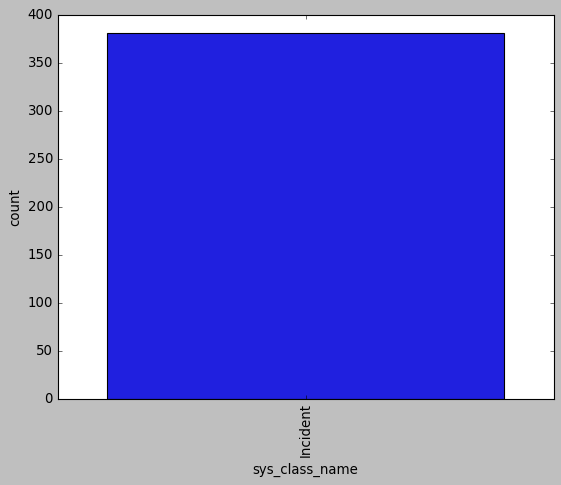

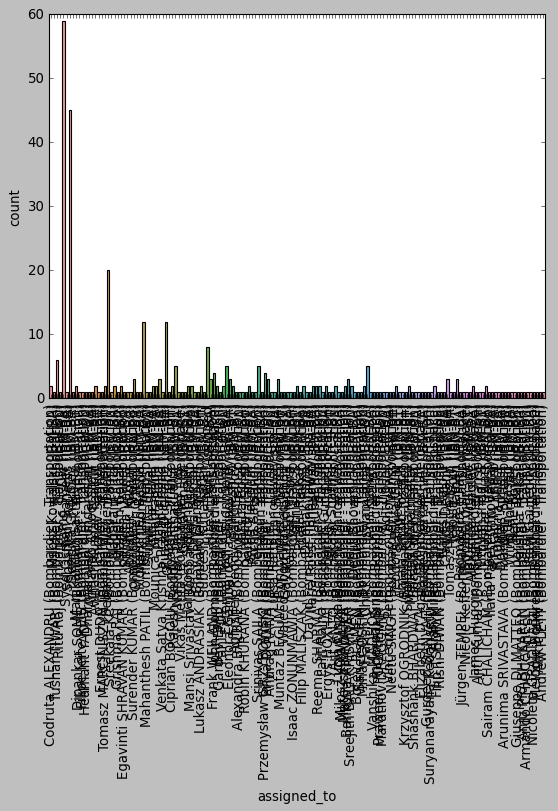

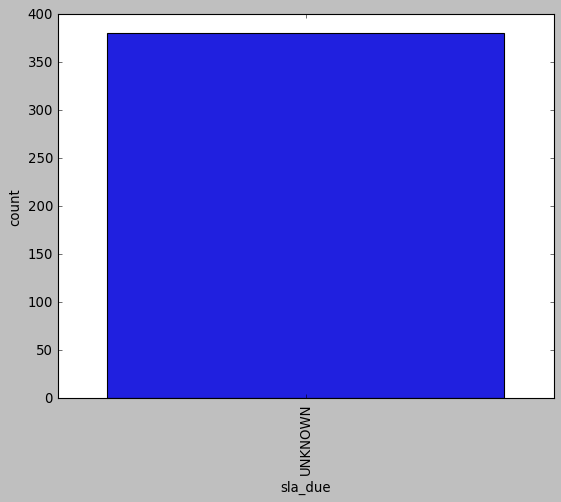

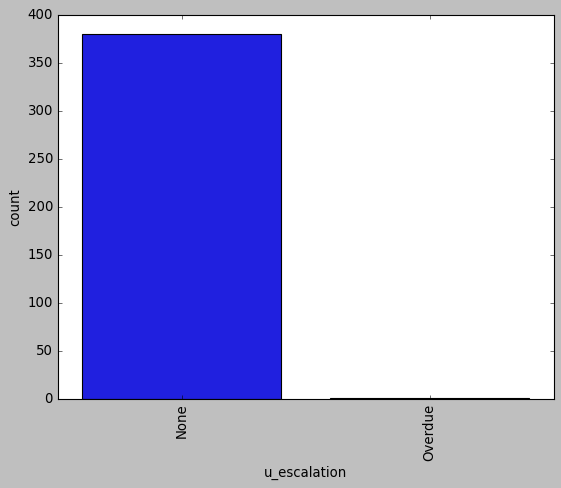

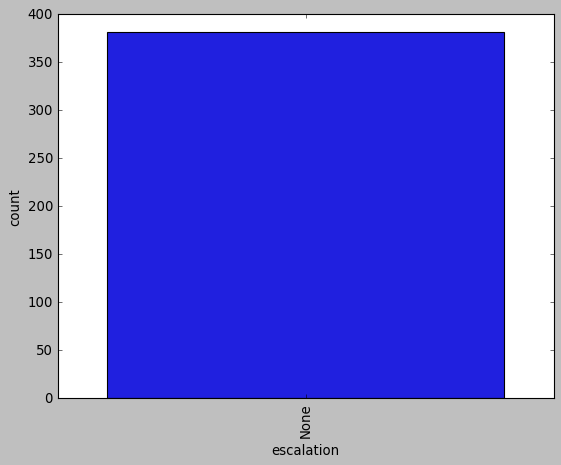

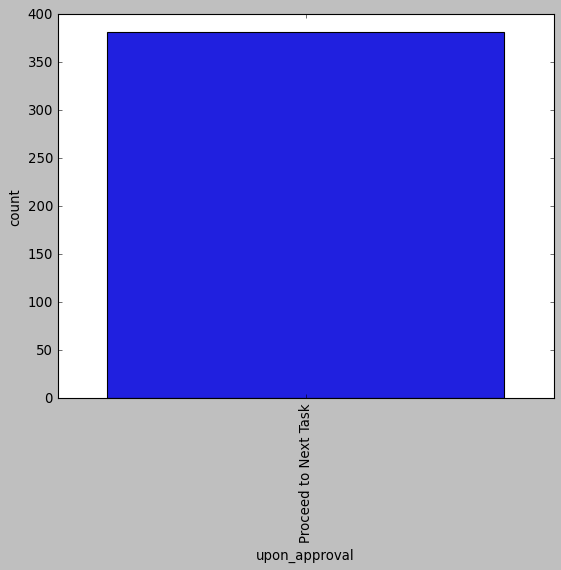

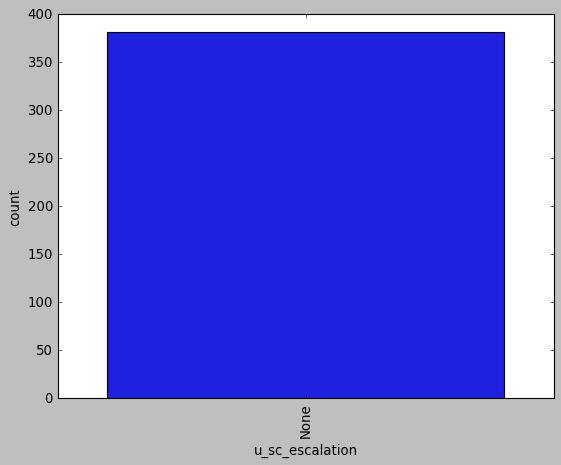

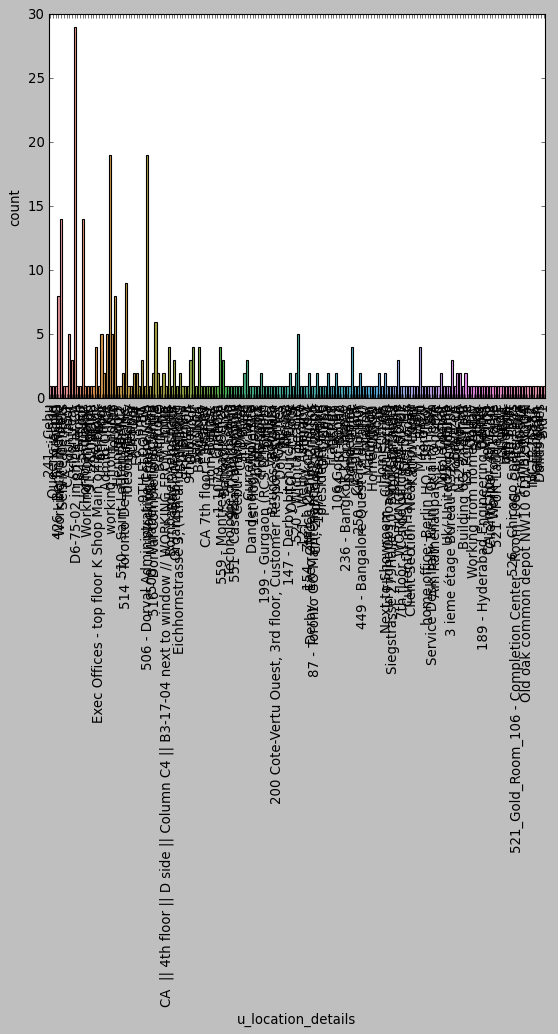

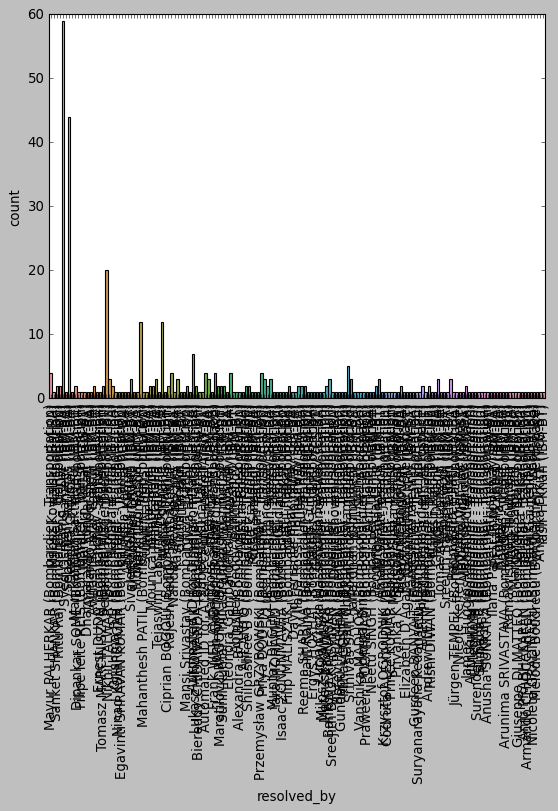

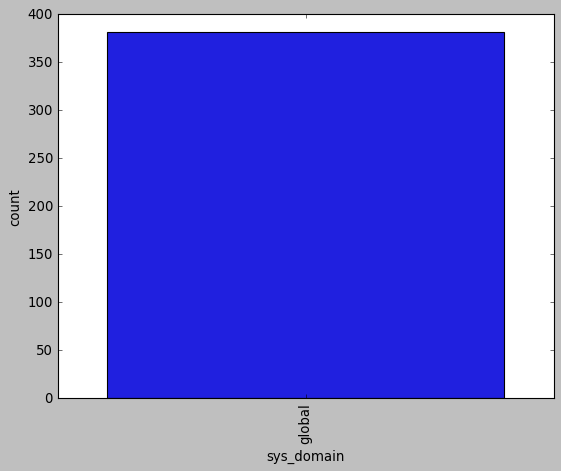

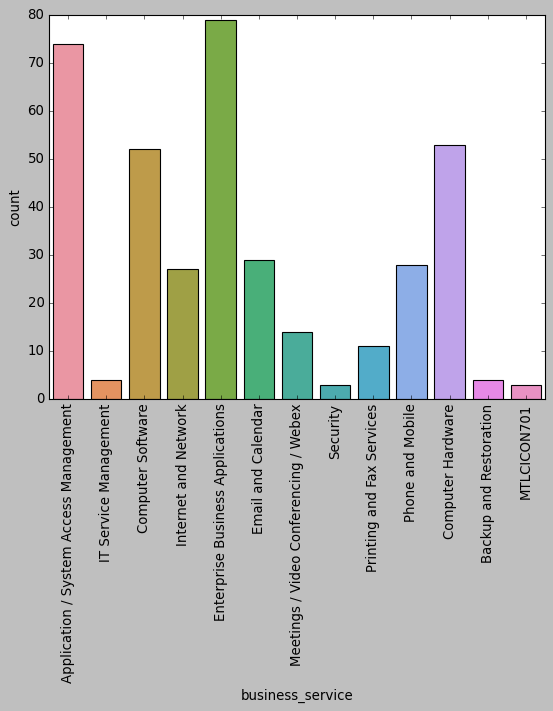

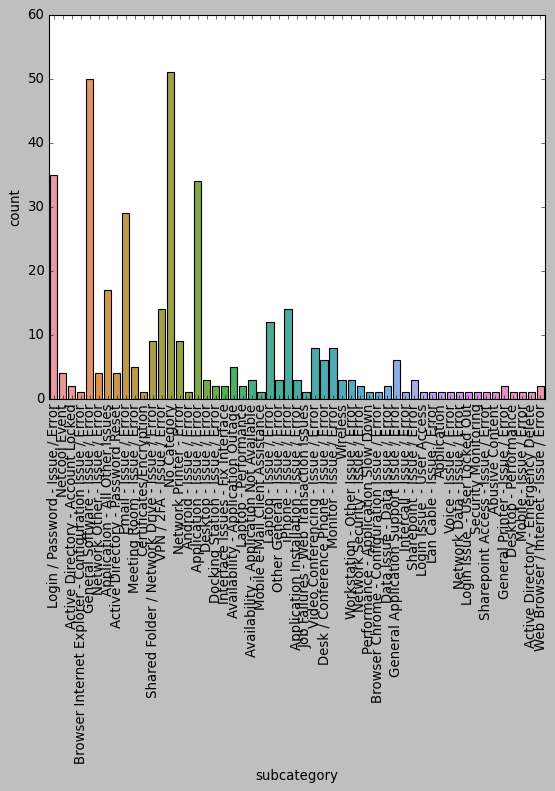

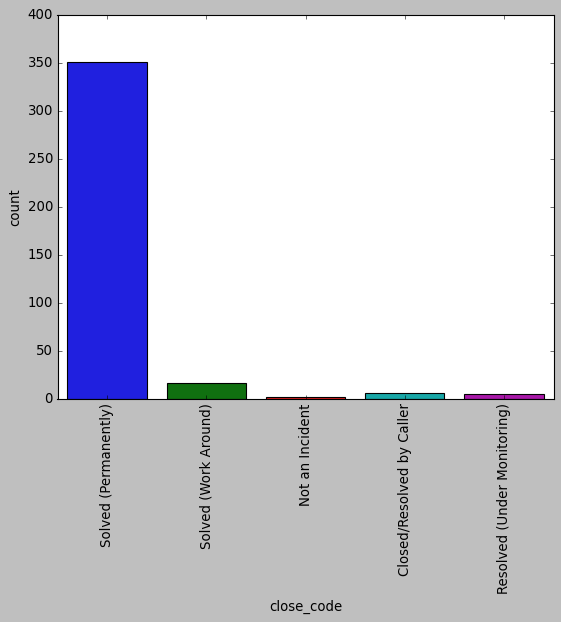

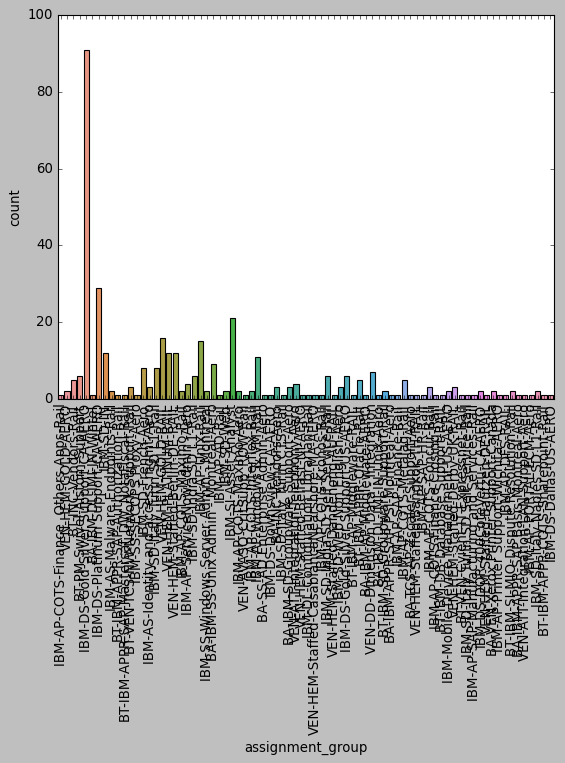

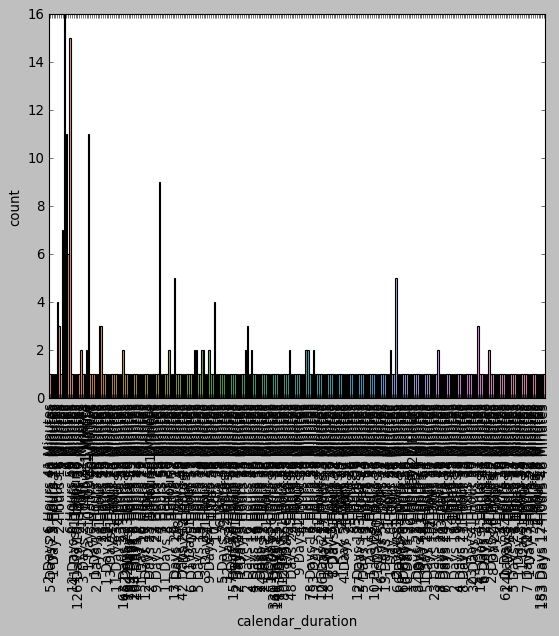

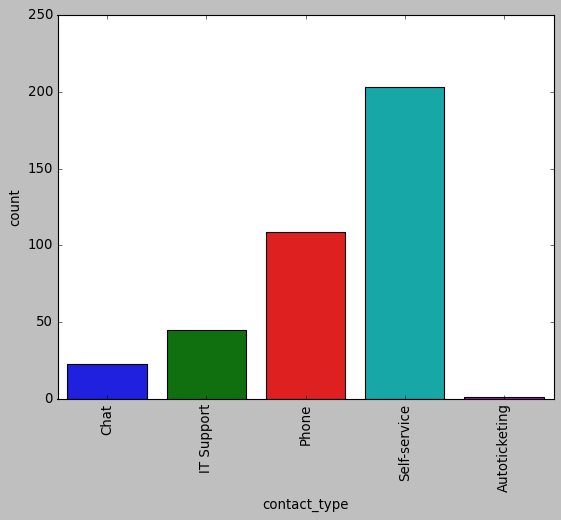

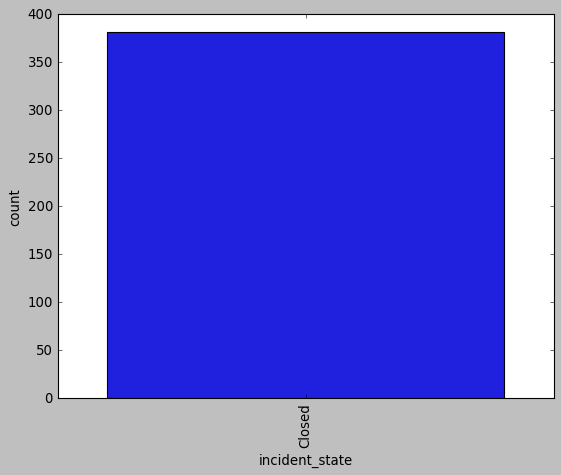

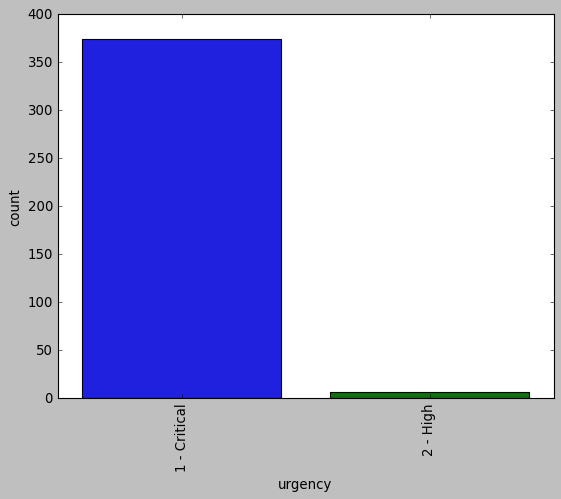

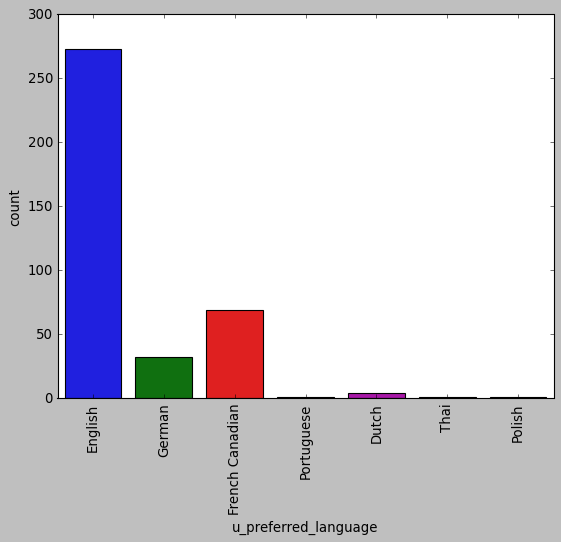

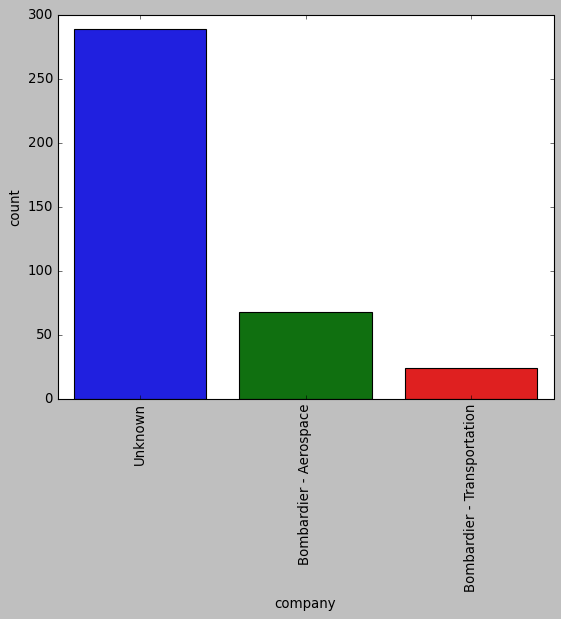

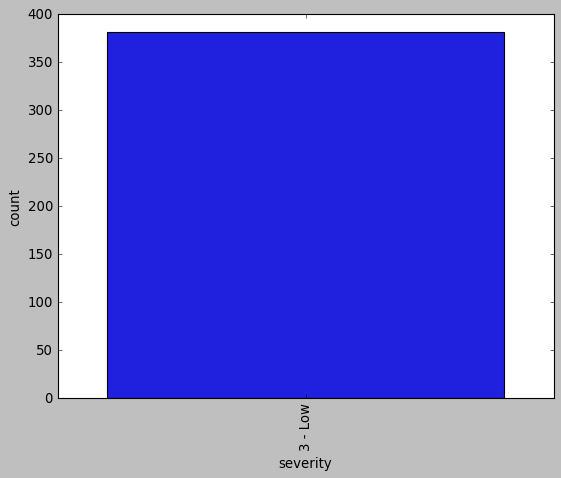

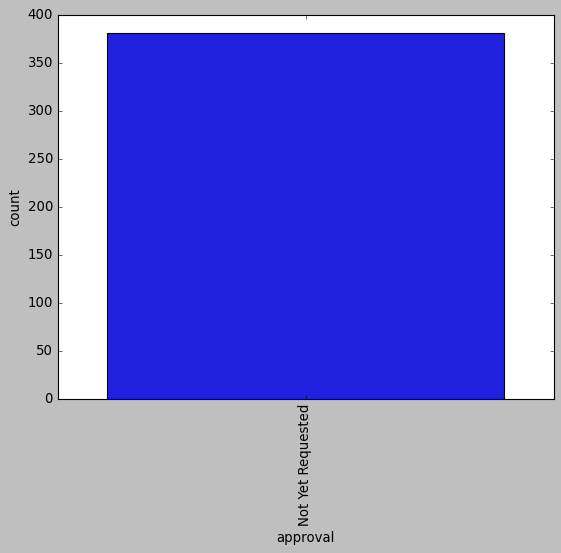

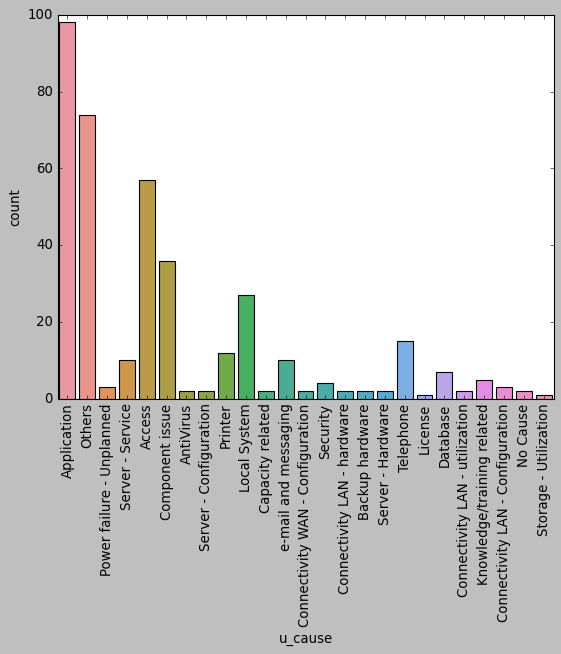

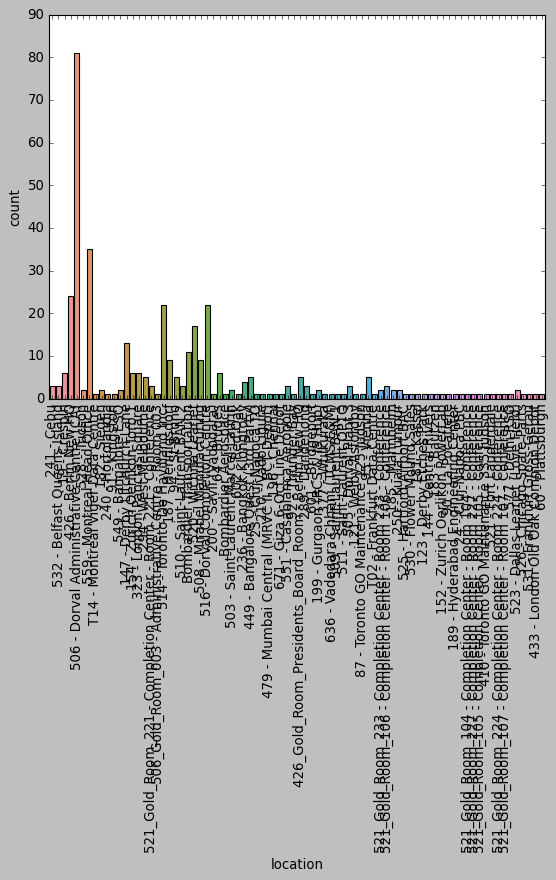

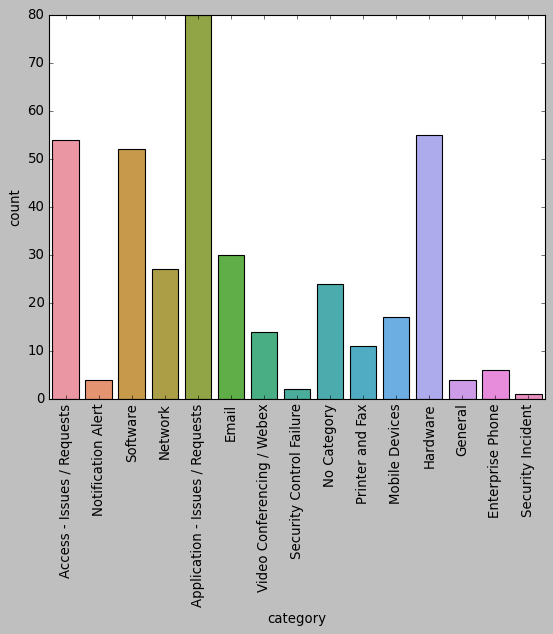

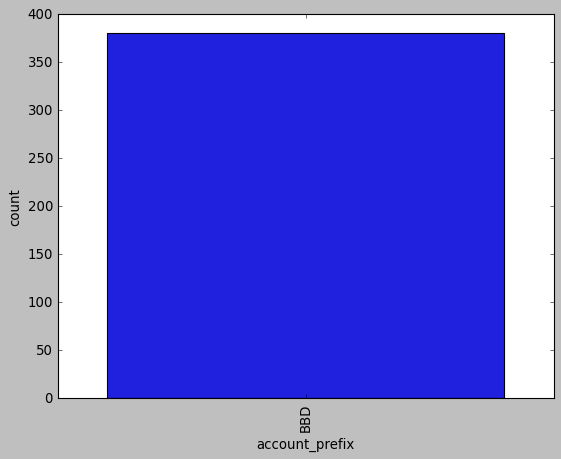

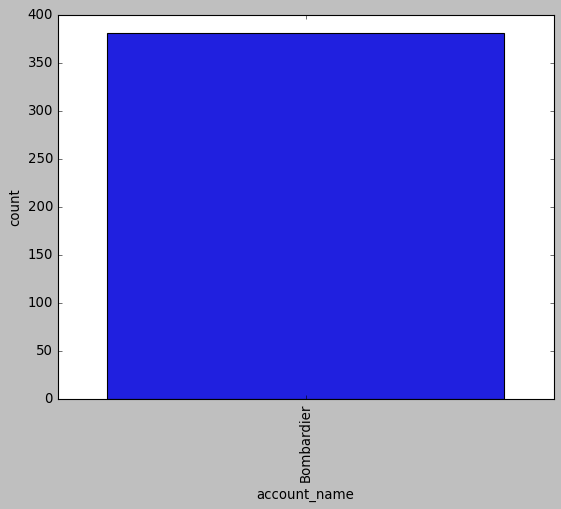

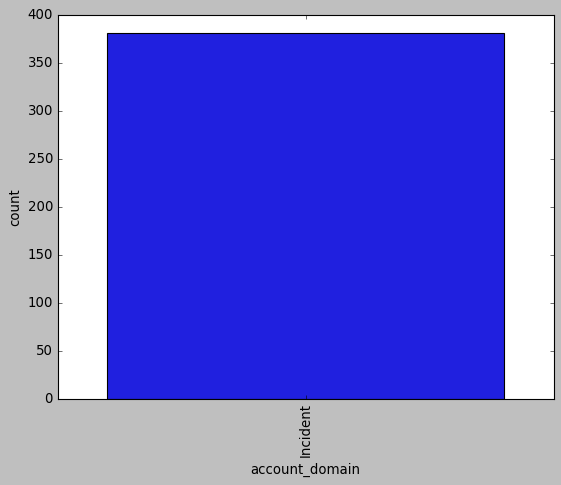

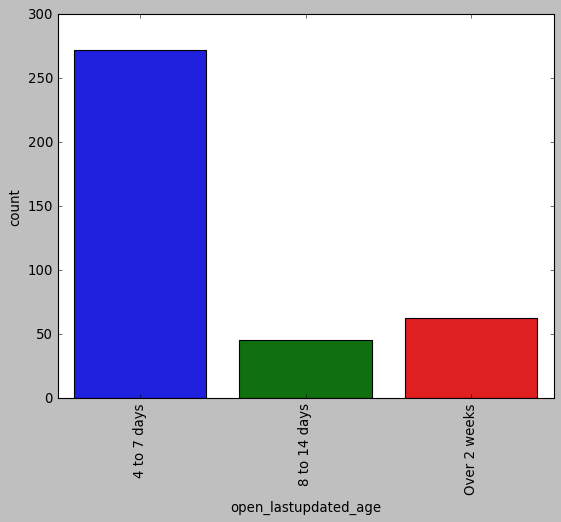

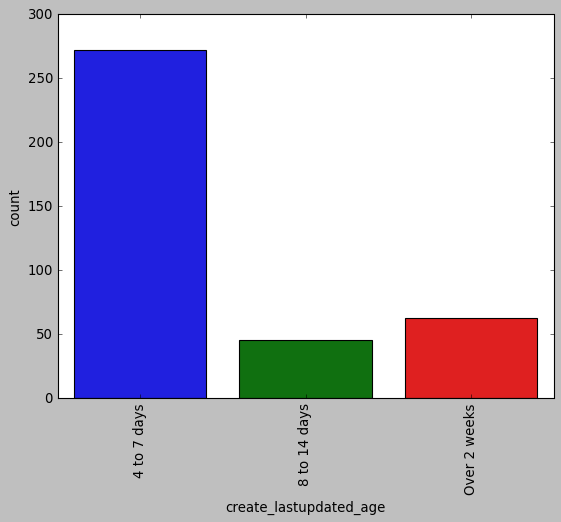

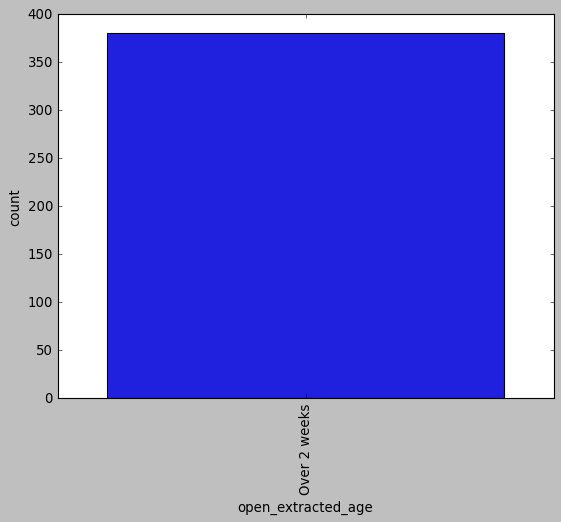

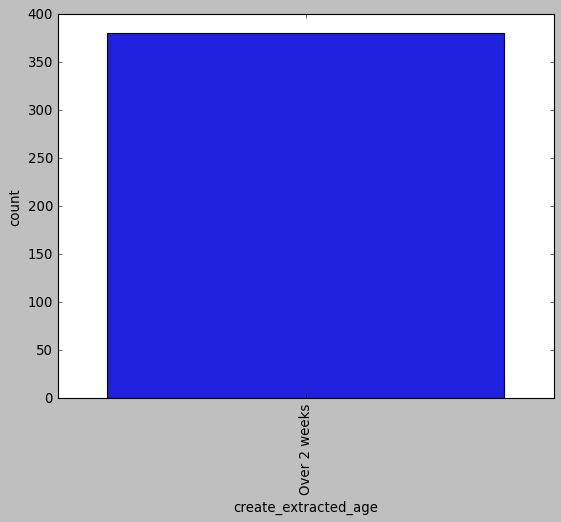

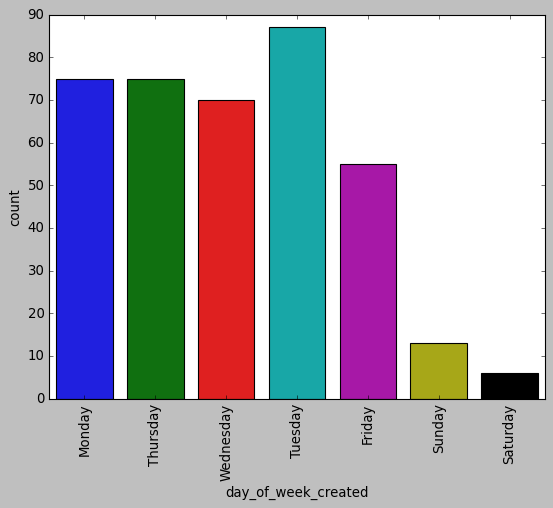

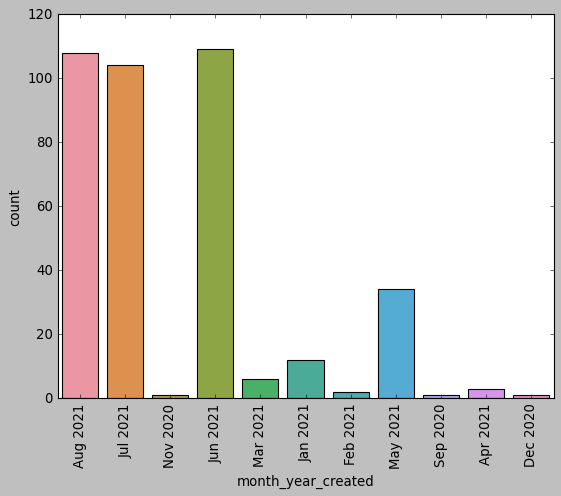

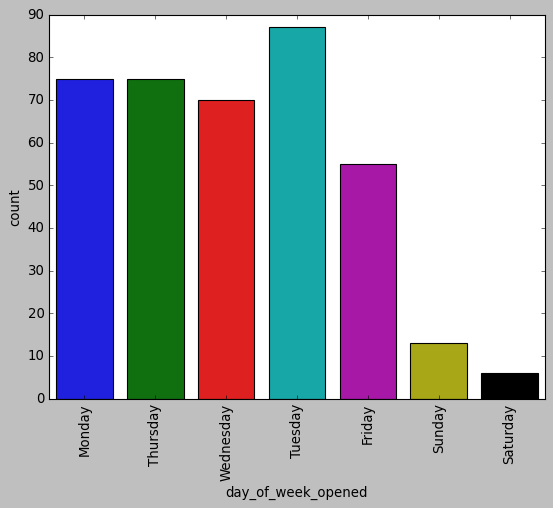

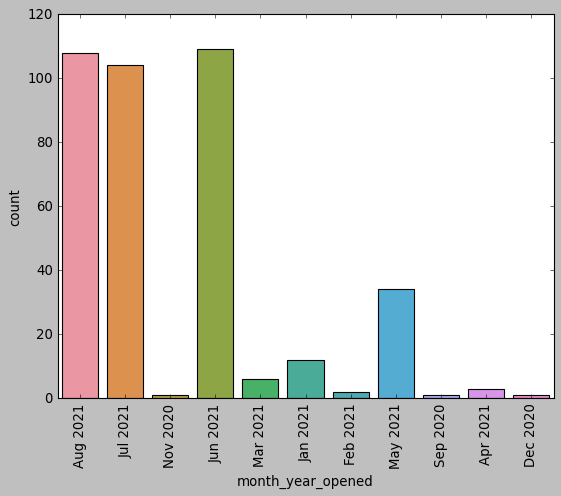

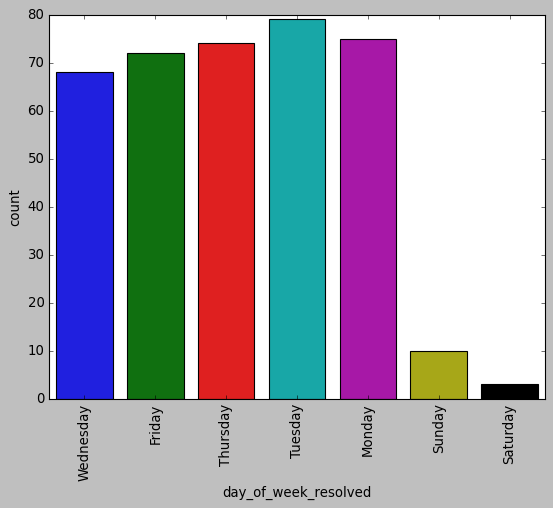

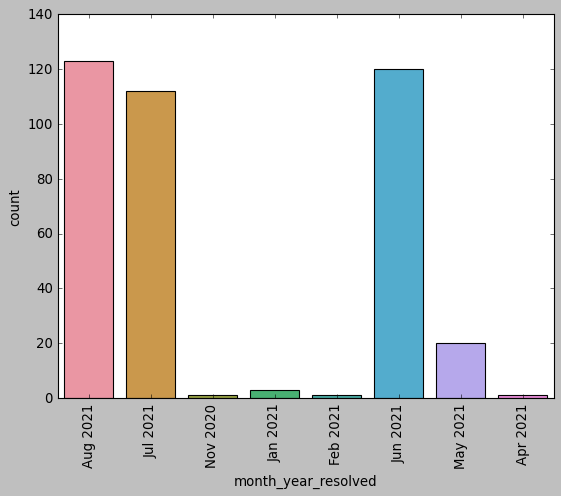

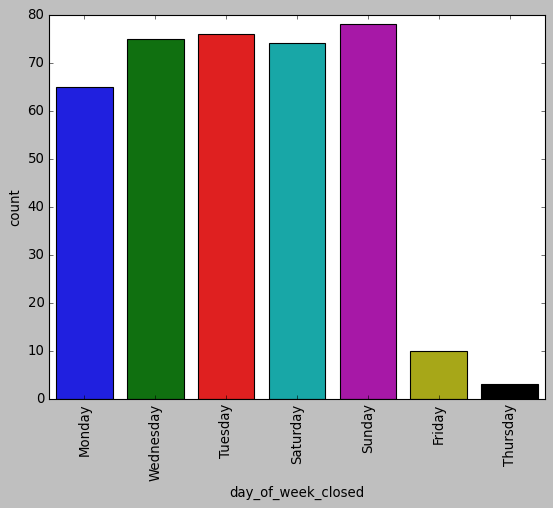

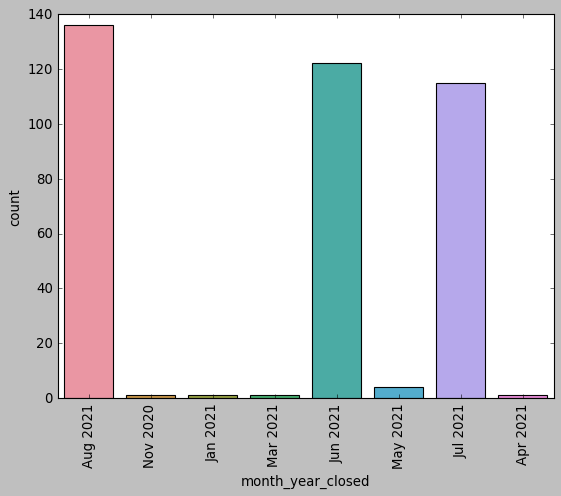

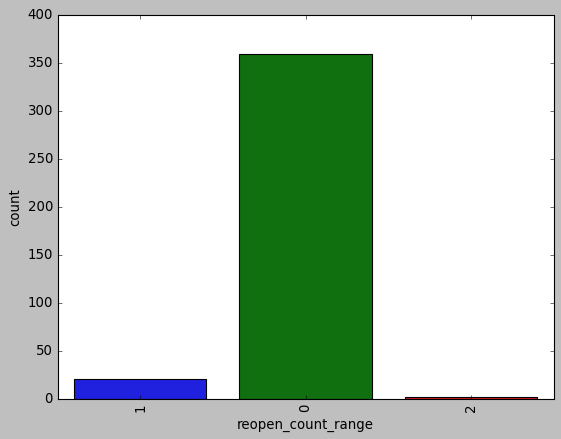

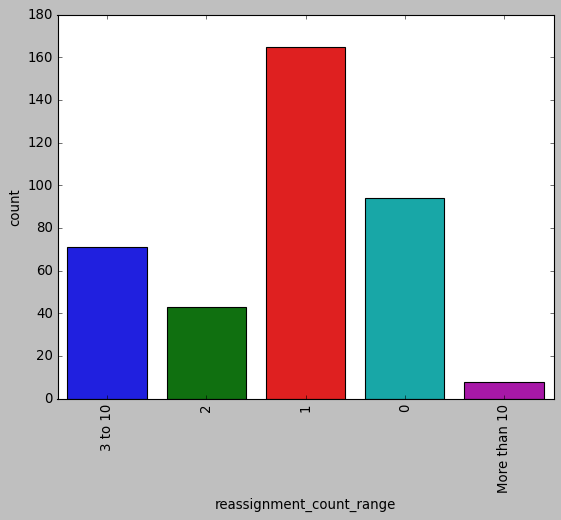

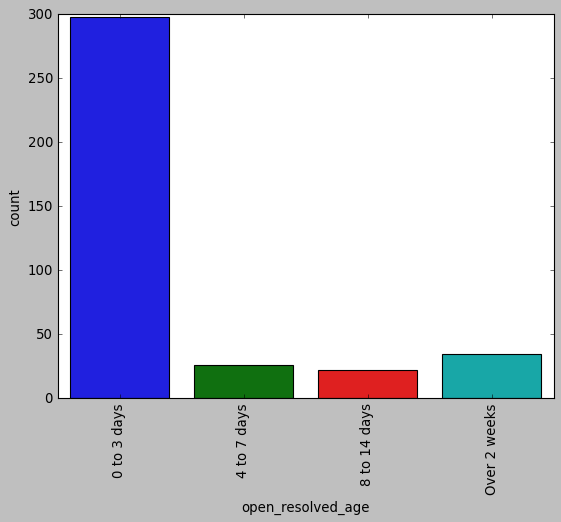

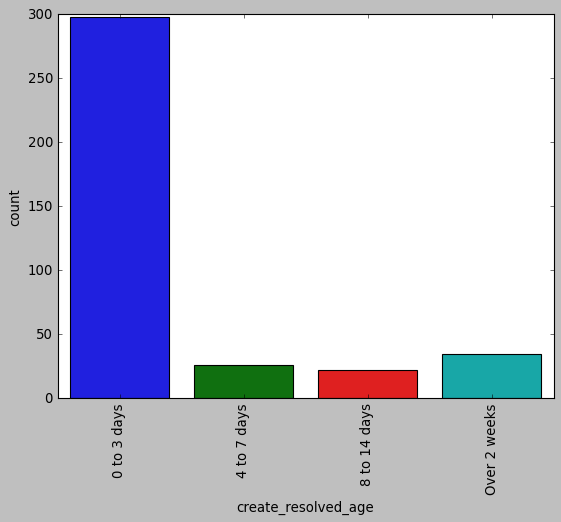

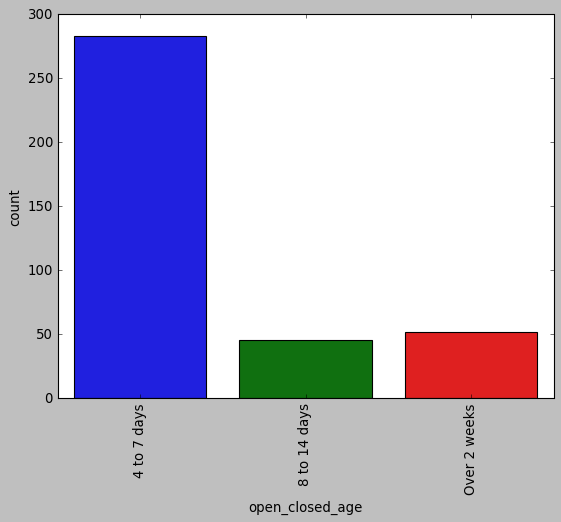

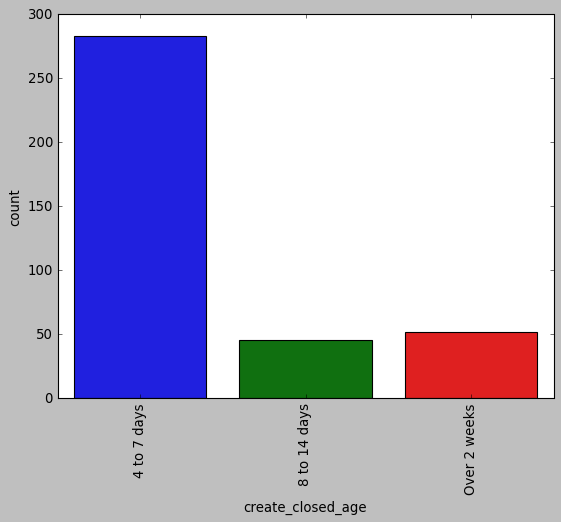

In [24]:
for col in cat_columns:
    plt.xticks(rotation=90)
    sns.countplot(x=col,data=dataframe_p1)
    plt.show()

In [25]:
dataframe_p1 = dataframe_p1.drop(['_index','_type','upon_reject','state','priority','sys_domain_path','u_qs_type','notify','sys_class_name','sla_due','u_escalation','escalation','upon_approval','u_sc_escalation','sys_domain','incident_state','severity','approval','account_prefix','account_name','account_domain','open_extracted_age','create_extracted_age'],axis=1)

## Splitting the dataframe based on training and testing ##

In [26]:
X1 = dataframe_p1[[i for i in list(dataframe_p1.columns) if i!='MTTR']]
y1 = dataframe_p1['MTTR']

In [27]:
## Split into train and test sets ##
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.33, random_state=1)

In [28]:
X1.shape, X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape

((381, 94), (255, 94), (126, 94), (255,), (126,))

## One Hot Encoding ##

In [29]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\000K1G744\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [30]:
import category_encoders as ce
import pandas as pd

In [31]:
cat_columns_1 = list(X_train_1.select_dtypes(['object']).columns)

In [32]:
cat_columns_2 = list(X_test_1.select_dtypes(['object']).columns)

In [33]:
cat_columns_1

['u_end_of_support',
 'u_qs_opened_by_group',
 'u_warranty_expired',
 'cmdb_ci',
 'impact',
 'business_duration',
 'service_offering',
 'assigned_to',
 'u_location_details',
 'resolved_by',
 'business_service',
 'subcategory',
 'close_code',
 'assignment_group',
 'calendar_duration',
 'contact_type',
 'urgency',
 'u_preferred_language',
 'company',
 'u_cause',
 'location',
 'category',
 'open_lastupdated_age',
 'create_lastupdated_age',
 'day_of_week_created',
 'month_year_created',
 'day_of_week_opened',
 'month_year_opened',
 'day_of_week_resolved',
 'month_year_resolved',
 'day_of_week_closed',
 'month_year_closed',
 'reopen_count_range',
 'reassignment_count_range',
 'open_resolved_age',
 'create_resolved_age',
 'open_closed_age',
 'create_closed_age']

In [34]:
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=['u_end_of_support','u_qs_opened_by_group','u_warranty_expired','cmdb_ci','impact','business_duration','service_offering','assigned_to','u_location_details','resolved_by','business_service','subcategory','close_code','assignment_group','calendar_duration','contact_type','urgency','u_preferred_language','company','u_cause','location','category','open_lastupdated_age','create_lastupdated_age','day_of_week_created','month_year_created','day_of_week_opened','month_year_opened','day_of_week_resolved','month_year_resolved','day_of_week_closed','month_year_closed','reopen_count_range','reassignment_count_range','open_resolved_age','create_resolved_age','open_closed_age','create_closed_age'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [35]:
X_train_1_new = encoder.fit_transform(X_train_1)

In [36]:
X_train_1_new.shape

(255, 1200)

In [37]:
X_test_1_new = encoder.transform(X_test_1)

In [38]:
X_test_1_new.shape

(126, 1200)

In [39]:
X_train_1_new.columns[X_train_1_new.isna().any()].tolist()

[]

In [40]:
X_test_1_new.columns[X_test_1_new.isna().any()].tolist()

['u_qs_opened_by_group_No Group',
 'u_qs_opened_by_group_IBM-SD-India SD L1-Rail',
 'u_qs_opened_by_group_BT-IBM-APPR-SAP-Basis-Rail',
 'u_qs_opened_by_group_BT-IBM-SI-Asset Governance-Rail',
 'u_qs_opened_by_group_IBM-SD-IN',
 'u_qs_opened_by_group_IBM-SD-Italy Turin SD L1-Rail',
 'u_qs_opened_by_group_IBM-SD-French-Aero',
 'u_qs_opened_by_group_IBM-AP-Asset Management',
 'u_qs_opened_by_group_IBM-SD-India CTS-Rail',
 'u_qs_opened_by_group_IBM-SD-Italy Naples SD L1-Rail',
 'u_qs_opened_by_group_IBM-AP-COTS-Maximo-Rail',
 'cmdb_ci_Unknown',
 'cmdb_ci_BTIS1000096836',
 'cmdb_ci_McAfee Complete Data Protection',
 'cmdb_ci_iPhone',
 'cmdb_ci_windows',
 'cmdb_ci_a010065p211',
 'cmdb_ci_eMail Service',
 'cmdb_ci_MSAF@IDM0018',
 'cmdb_ci_Computer Hardware',
 'cmdb_ci_Finance Monthly Closing',
 'cmdb_ci_Other Quality d/b',
 'cmdb_ci_SAP DWA/VCM-Finance PROD',
 'cmdb_ci_a010357p210',
 'cmdb_ci_Computer Software',
 'cmdb_ci_Active Directory Certificate Services',
 'cmdb_ci_Application / System 

In [41]:
X_test_1_new = X_test_1_new.fillna(X_test_1_new.median())

In [42]:
X_train_1_modified = X_train_1_new.fillna(X_train_1_new.mean())

In [43]:
X_test_1_modified = X_test_1_new.fillna(X_test_1_new.mean())

In [44]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X_test_1_knn = imputer.fit_transform(X_test_1_new)

In [45]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X_train_1_knn = imputer.fit_transform(X_train_1_new)

In [46]:
X_train_1_new.columns[X_train_1_new.isna().any()].tolist()

[]

In [47]:
X_test_1_knn = pd.DataFrame(X_test_1_knn)

In [48]:
X_test_1_knn.columns[X_test_1_knn.isna().any()].tolist()

[]

## Standardization ##

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
X_train_1_new_scaled = scaler.fit_transform(X_train_1_new)
X_test_1_new_scaled = scaler.transform(X_test_1_new)


In [52]:
X_train_1_modified_scaled = scaler.fit_transform(X_train_1_modified)
X_test_1_modified_scaled = scaler.transform(X_test_1_modified)

In [53]:
X_train_1_knn_scaled = scaler.fit_transform(X_train_1_knn)
X_test_1_knn_scaled = scaler.transform(X_test_1_knn)

## Simple Linear Regression  with median missing value approach##

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
regressor = LinearRegression()
regressor.fit(X_train_1_new_scaled,y_train_1)
print(regressor.score(X_test_1_new_scaled,y_test_1))
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test_1_new_scaled)
data1 = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred})
data1

0.9285282524523385
222.7350196078409
[ 0.52820295 -2.16876645 -1.80444325 ... -6.7055681  10.99087612
 -2.59726291]


Actual    Predicted
89813      1.415556   -11.040405
66017      2.505556    19.245469
101844    47.686111    61.264261
66590      2.802222    16.168846
85433   4320.441667  3410.099603
118367     0.030278    32.926294
54720    110.670278   175.768320
73031      3.077222   -54.086218
42964    144.569444    85.938118
111208     7.294167    88.631180
83385     12.380278    31.203416
125284     1.275278    22.764653
91023      0.117500   -13.523931
82654      3.324444     8.861658
22575    305.258611   325.938808
66894     22.065556   -31.697738
43307      2.038889    -3.707700
32490   1029.796944   852.675499
1641       2.130556   -14.633275
54943      6.331389    11.066611
134173     0.120278     2.889890
121543     4.524444   -26.774635
127757  1511.340556  1137.126317
60536      0.959167    36.652822
1885       2.266944   -10.760199
43553      3.269444     9.635473
82384    139.738611   126.966222
36437    220.971389   111.347839
87105    314.307778   347.707185
1529       0.241111     3.091278
99890    213.186389   143.150236
51933     68.823611   103.117322
138832     2.140278   394.839532
27684      2.883056    -0.637350
83481      3.166667   -82.761854
137413    31.479167    35.989556
28415      2.127222    -3.665538
126816     4.169444    -1.844415
140418  4404.477778  3983.864019
64320      3.444722    25.874951
134161     0.279167   -13.970733
109945   158.868611   202.392106
2939       2.382778     4.638306
52186      0.924444    28.538045
105892     0.041389    29.747309
64647      1.919444    -5.364903
92228      0.881944   -18.981606
27204      3.515556    18.018702
128832     7.416111    23.667232
60422   3519.474167  3039.222461
22909     71.270278   239.639563
19141     20.374722     0.766892
2087       0.083056    16.947720
134149     0.197222   -14.778975
2944       1.381111    30.283469
140451  3689.802500  3452.184239
123466     0.470278     1.969407
36856      0.043333   -13.998339
35492     22.474444   -88.939760
74483      1.397222    30.821365
61706      0.049722     0.898681
112715   119.564167   115.619277
12454     73.430278    52.119126
84132      0.523889   -20.839362
52174      0.101389    12.516677
32917      8.252222    -5.766055
6448       3.680278     0.707245
103918     0.296667   -25.561376
2194     296.832778  1364.350757
112615     9.647778    28.048572
85464   4109.033889  3336.460780
121588  3485.077500  2511.998720
121803   146.796667  1513.056958
62309   1935.725278  2097.723388
69192      0.370000     5.756608
67839     47.070278    -4.352089
121561     0.626111    -0.878005
128845     0.053611    22.777929
104178   168.624722   228.337080
33340      0.193889    14.423625
133001   141.620556   125.570027
127087     0.153611    26.291025
7064       0.080278   -11.970947
110065     2.073611    24.431063
24568      7.906667    -2.750464
32558    170.100000   209.369709
44159    770.111944   776.643623
33990    135.235278   127.007348
32948     25.619722     1.418560
100331    23.133056   -28.009551
116899     0.212778     3.124139
121813   146.716389  1482.236046
91739      0.152778   -25.113785
123826    71.046111    81.457147
10295      0.066111     0.841653
100874    18.905278     6.492835
101012     0.636944    -4.012475
79626    307.494722   355.287349
123860   198.041667   184.305620
17359      0.737778     5.368833
2095       6.841111     0.171391
108194   188.921389   135.466666
94138      1.803611     6.679539
32839      4.108889   -65.749417
137080    23.539444   -10.256424
140808     0.059722     6.461102
100595     0.918333    10.285034
7395       0.281389    23.397249
28611    186.271389   115.583792
17282   3938.786111  3576.040444
78472      0.943889   -40.676008
60525   3674.448056  3596.192478
86166    149.208889   142.292987
63238      2.795556    -2.461391
135657    26.987778     0.426325
82255      0.085000    10.618371
126954    26.819722    21.528202
111207     2.793611   146.116485
67618    641.061111   829.953246
50306    379.435833   603.137443
27527      1.156944 

## Mean Absolute Error , Mean Squared Error R sqaured and Adjusted R squared

In [56]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_1,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test_1,y_pred)))

MSE 66372.44498759178
RMSE 257.6285018929229


from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_1,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test_1,y_pred)))

In [57]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test_1,y_pred))

MAE 97.74504746327513


In [58]:
np.mean(y_test_1)

336.1252623456792

C:\Users\000K1G744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MTTR'>

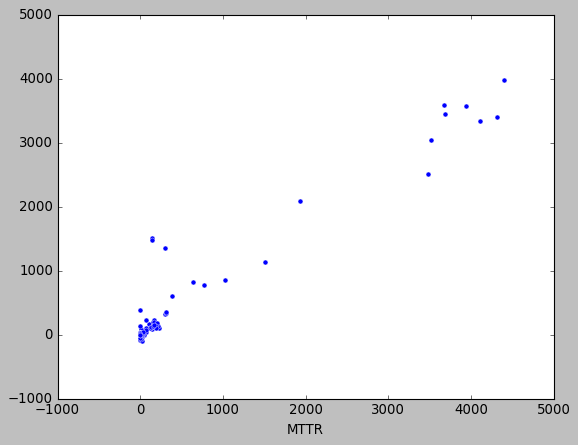

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(y_test_1, y_pred)

In [60]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_1,y_pred)
print(r2)

0.9285282524523385


In [61]:
Adj_r2 = 1 - (1-r2_score(y_test_1, y_pred)) * (len(y1)-1)/(len(y1)-X1.shape[1]-1)
print(Adj_r2)

0.9050375382233868


## Coefficient interpretation ##

In [62]:
coefficent= regressor.coef_
absolute_coefficient = abs(regressor.coef_)

In [63]:
columns= X_train_1_new.columns
data = {'features': columns,'coefficient':coefficent,'absolute_coefficient':absolute_coefficient}


In [64]:
feature_importance = pd.DataFrame(data)

In [65]:
feature_importance = feature_importance.sort_values('absolute_coefficient',ascending=False)

In [66]:
feature_importance_modified = feature_importance.sort_values('coefficient',ascending=True)

## Top 20 features ##

In [67]:
top_negative_20 = feature_importance_modified.head(20)

In [68]:
top_negative_20

features  coefficient  \
1129                                     year_of_opened   -19.159715   
1110                                    year_of_created   -19.159715   
1188                    create_resolved_age_0 to 3 days    -9.134434   
1183                      open_resolved_age_0 to 3 days    -9.134434   
1109                                   month_of_created    -8.287209   
1128                                    month_of_opened    -8.287209   
747         assignment_group_IBM-AP-COTS-Interflex-Rail    -7.844186   
1154                       month_year_resolved_Jan 2021    -7.844186   
562   resolved_by_Ciprian BOGOIU (Bombardier - Trans...    -7.844186   
847                  calendar_duration_1 Day 15 Minutes    -7.844186   
1170                         month_year_closed_Jan 2021    -7.844186   
298   assigned_to_Ciprian BOGOIU (Bombardier - Trans...    -7.844186   
288      assigned_to_Harish Chikkamuniswamappa (IBM-BA)    -7.660833   
553      resolved_by_Harish Chikkamuniswamappa (IBM-BA)    -7.660833   
7                         u_qs_opened_by_group_No Group    -7.298335   
1197                      create_closed_age_4 to 7 days    -6.705568   
1193                        open_closed_age_4 to 7 days    -6.697493   
176        business_duration_14 Days 8 Hours 29 Minutes    -6.190324   
836        calendar_duration_59 Days 5 Hours 55 Minutes    -6.030611   
428      u_location_details_508 - Mirabel Manufacturing    -6.030611   

      absolute_coefficient  
1129             19.159715  
1110             19.159715  
1188              9.134434  
1183              9.134434  
1109              8.287209  
1128              8.287209  
747               7.844186  
1154              7.844186  
562               7.844186  
847               7.844186  
1170              7.844186  
298               7.844186  
288               7.660833  
553               7.660833  
7                 7.298335  
1197              6.705568  
1193              6.697493  
176               6.190324  
836               6.030611  
428               6.030611

In [69]:
top_20 = feature_importance.head(30)

In [70]:
below_20 = feature_importance.tail(20)

In [71]:
below_20

features  coefficient  \
433                  u_location_details_1-1079, cube 56    -0.009103   
205                 business_duration_1 Hour 31 Minutes     0.007997   
695           subcategory_Network Other - Issue / Error     0.006809   
1160                          day_of_week_closed_Friday    -0.006515   
813                        calendar_duration_20 Minutes    -0.004705   
608         resolved_by_Dharmarajan Sundaresan (IBM-BA)    -0.004652   
344         assigned_to_Dharmarajan Sundaresan (IBM-BA)    -0.004652   
472                           u_location_details_INDIA     -0.004652   
769           assignment_group_IBM-SS-SECOPS Proxy-Aero    -0.004652   
999                 u_cause_Connectivity LAN - hardware     0.004301   
585   resolved_by_James Huggins (Bombardier - Aerosp...    -0.003685   
320   assigned_to_James Huggins (Bombardier - Aerosp...    -0.003685   
877                 calendar_duration_3 Days 16 Minutes    -0.003685   
758   assignment_group_IBM-AP-Printer Support-Wichit...    -0.003685   
262       assigned_to_External Tool Assignment (IBM-BA)    -0.003627   
382                                            made_sla     0.000000   
980                                  u_callback_netcool     0.000000   
381                                u_escalation_level_2     0.000000   
1148                                   year_of_resolved     0.000000   
1165                                     year_of_closed     0.000000   

      absolute_coefficient  
433               0.009103  
205               0.007997  
695               0.006809  
1160              0.006515  
813               0.004705  
608               0.004652  
344               0.004652  
472               0.004652  
769               0.004652  
999               0.004301  
585               0.003685  
320               0.003685  
877               0.003685  
758               0.003685  
262               0.003627  
382               0.000000  
980               0.000000  
381               0.000000  
1148              0.000000  
1165              0.000000

In [72]:
top_20

features  coefficient  \
1187                               create_resolved_days    31.823404   
1182                                 open_resolved_days    31.823404   
1181                             calendar_duration_mins    31.800942   
1092                              open_resolved_seconds    31.800045   
1180                             business_duration_mins    31.774185   
1093                            create_resolved_seconds    31.772550   
1196                                 create_closed_days    31.765484   
1192                                   open_closed_days    31.764421   
1095                              create_closed_seconds    31.715637   
1094                                open_closed_seconds    31.685122   
1082                           open_lastupdated_seconds    26.565828   
1088                            create_lastupdated_days    26.545676   
1083                              open_lastupdated_days    26.545676   
1087                         create_lastupdated_seconds    26.474159   
10    u_qs_opened_by_group_BT-IBM-SI-Asset Governanc...    23.959619   
214        business_duration_48 Days 8 Hours 23 Minutes    21.749101   
908       calendar_duration_203 Days 6 Hours 52 Minutes    21.697842   
721               assignment_group_IBM-SI-Asset Analyst    19.765453   
209                           business_duration_79 Days    19.232401   
605   resolved_by_Lalit Raina (Bombardier - Transpor...    19.176939   
469       u_location_details_147 - Derby Litchurch Lane    19.176917   
340   assigned_to_Lalit Raina (Bombardier - Transpor...    19.176917   
904      calendar_duration_330 Days 22 Hours 32 Minutes    19.176917   
1118                        month_year_created_Sep 2020    19.176917   
1137                         month_year_opened_Sep 2020    19.176917   
1110                                    year_of_created   -19.159715   
1129                                     year_of_opened   -19.159715   
547                  resolved_by_Puran Dudhane (IBM-BA)    17.929439   
283                  assigned_to_Puran Dudhane (IBM-BA)    17.929439   
1189                   create_resolved_age_Over 2 weeks    17.714499   

      absolute_coefficient  
1187             31.823404  
1182             31.823404  
1181             31.800942  
1092             31.800045  
1180             31.774185  
1093             31.772550  
1196             31.765484  
1192             31.764421  
1095             31.715637  
1094             31.685122  
1082             26.565828  
1088             26.545676  
1083             26.545676  
1087             26.474159  
10               23.959619  
214              21.749101  
908              21.697842  
721              19.765453  
209              19.232401  
605              19.176939  
469              19.176917  
340              19.176917  
904              19.176917  
1118             19.176917  
1137             19.176917  
1110             19.159715  
1129             19.159715  
547              17.929439  
283              17.929439  
1189             17.714499

In [73]:
top_20.index=top_20['features']

<AxesSubplot:xlabel='features'>

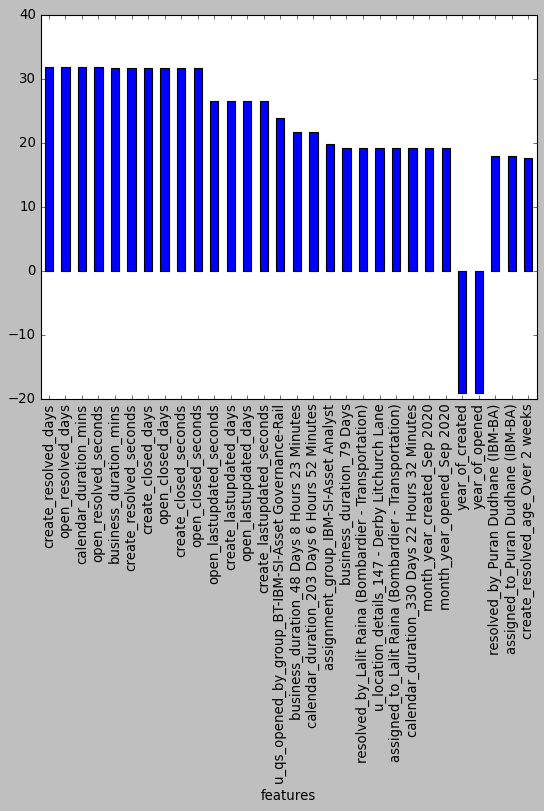

In [74]:
top_20['coefficient'].plot(kind='bar')

In [75]:
feature_importance_test = feature_importance

In [76]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [77]:
 mean_absolute_percentage_error(y_test_1, y_pred)

4019.076976464666

In [78]:
from sklearn import metrics

metrics.accuracy_score(y_test_1, y_pred)

ValueError: continuous is not supported

In [79]:
import matplotlib.pyplot as plt

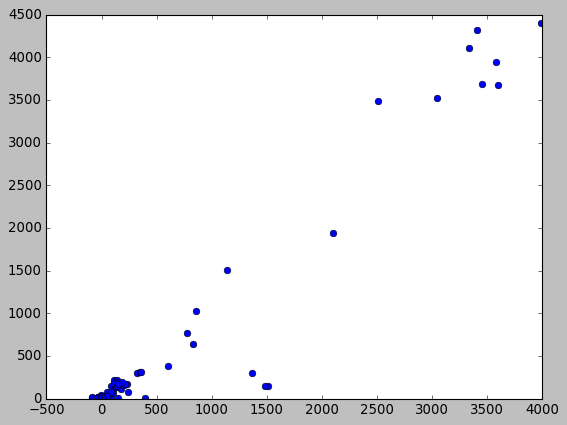

In [80]:
plt.plot(y_pred,y_test_1,'o')

## Simple Linear regression with Mean ##

In [81]:
regressor_mean = LinearRegression()
regressor_mean.fit(X_train_1_modified_scaled,y_train_1)
print(regressor.score(X_test_1_modified_scaled,y_test_1))
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred_1 = regressor.predict(X_test_1_modified_scaled)
data2 = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred})

0.9285282524523385
222.7350196078409
[ 0.52820295 -2.16876645 -1.80444325 ... -6.7055681  10.99087612
 -2.59726291]


## Mean Absolute Error , Mean Squared Error R sqaured and Adjusted R squared

In [82]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_1,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test_1,y_pred_1)))

MSE 66372.44498759178
RMSE 257.6285018929229


In [83]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test_1,y_pred_1))

MAE 97.74504746327513


In [84]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_1,y_pred_1)
print(r2)

0.9285282524523385


In [85]:
Adj_r2 = 1 - (1-r2_score(y_test_1, y_pred_1)) * (len(y1)-1)/(len(y1)-X1.shape[1]-1)
print(Adj_r2)

0.9050375382233868


In [86]:
 mean_absolute_percentage_error(y_test_1, y_pred_1)

4019.076976464666

## Simple Linear Regression  with KNN missing value approach

In [87]:
regressor_knn = LinearRegression()
regressor_knn.fit(X_train_1_knn_scaled,y_train_1)
print(regressor.score(X_test_1_knn_scaled,y_test_1))
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred_2 = regressor.predict(X_test_1_knn_scaled)
data3 = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_2})

0.9285282524523385
222.7350196078409
[ 0.52820295 -2.16876645 -1.80444325 ... -6.7055681  10.99087612
 -2.59726291]


## Mean Absolute Error , Mean Squared Error R sqaured and Adjusted R squared

In [88]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_1,y_pred_2))
print("RMSE",np.sqrt(mean_squared_error(y_test_1,y_pred_2)))

MSE 66372.44498759178
RMSE 257.6285018929229


In [89]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test_1,y_pred_2))

MAE 97.74504746327513


In [90]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_1,y_pred_2)
print(r2)

0.9285282524523385


In [91]:
Adj_r2 = 1 - (1-r2_score(y_test_1, y_pred_2)) * (len(y1)-1)/(len(y1)-X1.shape[1]-1)
print(Adj_r2)

0.9050375382233868


In [92]:
 mean_absolute_percentage_error(y_test_1, y_pred_2)

4019.076976464666

## Multicollinearity and Backward and forward feature selection ##

In [93]:
X_variables = X_train_1_new.columns

In [94]:
X

NameError: name 'X' is not defined

In [95]:
vif_data = pd.DataFrame()

In [96]:
vif_data["feature"] = X_variables

In [97]:
vif_data["feature"]

0                                                  _score
1                                   u_qs_times_reassigned
2                                     u_qs_major_incident
3                             u_end_of_support_No Support
4                                u_end_of_support_Unknown
5                                    u_end_of_support_Yes
6                                     u_end_of_support_No
7                           u_qs_opened_by_group_No Group
8            u_qs_opened_by_group_IBM-SD-India SD L1-Rail
9         u_qs_opened_by_group_BT-IBM-APPR-SAP-Basis-Rail
10      u_qs_opened_by_group_BT-IBM-SI-Asset Governanc...
11                         u_qs_opened_by_group_IBM-SD-IN
12      u_qs_opened_by_group_IBM-SD-Italy Turin SD L1-...
13                u_qs_opened_by_group_IBM-SD-French-Aero
14           u_qs_opened_by_group_IBM-AP-Asset Management
15             u_qs_opened_by_group_IBM-SD-India CTS-Rail
16      u_qs_opened_by_group_IBM-SD-Italy Naples SD L1...
17           u

In [98]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
vif_data["VIF"] = [variance_inflation_factor(X_variables, i) for i in range(len(X_variables))]

IndexError: tuple index out of range

In [100]:
dataframe_p1.columns

Index(['_score', 'u_qs_times_reassigned', 'u_qs_major_incident',
       'u_end_of_support', 'u_qs_opened_by_group', 'u_warranty_expired',
       'u_lan_bank_of_hours', 'u_qs_fcresolve', 'knowledge', 'cmdb_ci',
       'impact', 'active', 'business_duration', 'service_offering',
       'u_sla_held', 'reassignment_count', 'assigned_to', 'u_mio_invoked',
       'u_escalation_level_2', 'made_sla', 'u_escalation_level_1',
       'u_location_details', 'child_incidents', 'resolved_by', 'calendar_stc',
       'business_service', 'subcategory', 'u_vip_gold_room_service',
       'close_code', 'assignment_group', 'business_stc', 'calendar_duration',
       'contact_type', 'u_qs_rca_required', 'urgency', 'u_preferred_language',
       'company', 'u_callback_netcool', 'u_qs_times_reopened', 'sys_mod_count',
       'u_cause', 'reopen_count', 'location', 'category',
       'open_lastupdated_seconds', 'open_lastupdated_days',
       'open_lastupdated_age', 'create_lastupdated_seconds',
       'create_l

In [101]:
list(dataframe_p1.select_dtypes(['object']).columns)

['u_end_of_support',
 'u_qs_opened_by_group',
 'u_warranty_expired',
 'cmdb_ci',
 'impact',
 'business_duration',
 'service_offering',
 'assigned_to',
 'u_location_details',
 'resolved_by',
 'business_service',
 'subcategory',
 'close_code',
 'assignment_group',
 'calendar_duration',
 'contact_type',
 'urgency',
 'u_preferred_language',
 'company',
 'u_cause',
 'location',
 'category',
 'open_lastupdated_age',
 'create_lastupdated_age',
 'day_of_week_created',
 'month_year_created',
 'day_of_week_opened',
 'month_year_opened',
 'day_of_week_resolved',
 'month_year_resolved',
 'day_of_week_closed',
 'month_year_closed',
 'reopen_count_range',
 'reassignment_count_range',
 'open_resolved_age',
 'create_resolved_age',
 'open_closed_age',
 'create_closed_age']

In [102]:
list(dataframe_p1.select_dtypes(['bool']).columns)

['u_qs_major_incident',
 'u_lan_bank_of_hours',
 'u_qs_fcresolve',
 'knowledge',
 'active',
 'u_sla_held',
 'u_mio_invoked',
 'u_escalation_level_2',
 'made_sla',
 'u_escalation_level_1',
 'u_vip_gold_room_service',
 'u_qs_rca_required',
 'u_callback_netcool']

## Step Forward Selection ##

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## Label Encoding of object variables ##

In [105]:
dataframe_p1_ordinal = dataframe_p1.copy()

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
le = LabelEncoder()

In [108]:
dataframe_p1_ordinal['u_preferred_language'] = le.fit_transform(dataframe_p1_ordinal['u_preferred_language'])
dataframe_p1_ordinal['u_end_of_support'] = le.fit_transform(dataframe_p1_ordinal['u_end_of_support'])
dataframe_p1_ordinal['u_qs_opened_by_group'] = le.fit_transform(dataframe_p1_ordinal['u_qs_opened_by_group'])
dataframe_p1_ordinal['u_warranty_expired'] = le.fit_transform(dataframe_p1_ordinal['u_warranty_expired'])
dataframe_p1_ordinal['cmdb_ci'] = le.fit_transform(dataframe_p1_ordinal['cmdb_ci'])
dataframe_p1_ordinal['impact'] = le.fit_transform(dataframe_p1_ordinal['impact'])
dataframe_p1_ordinal['business_duration'] = le.fit_transform(dataframe_p1_ordinal['business_duration'])
dataframe_p1_ordinal['service_offering'] = le.fit_transform(dataframe_p1_ordinal['service_offering'])
dataframe_p1_ordinal['assigned_to'] = le.fit_transform(dataframe_p1_ordinal['assigned_to'])
dataframe_p1_ordinal['u_location_details'] = le.fit_transform(dataframe_p1_ordinal['u_location_details'])
dataframe_p1_ordinal['resolved_by'] = le.fit_transform(dataframe_p1_ordinal['resolved_by'])
dataframe_p1_ordinal['business_service'] = le.fit_transform(dataframe_p1_ordinal['business_service'])
dataframe_p1_ordinal['subcategory'] = le.fit_transform(dataframe_p1_ordinal['subcategory'])
dataframe_p1_ordinal['close_code'] = le.fit_transform(dataframe_p1_ordinal['close_code'])
dataframe_p1_ordinal['assignment_group'] = le.fit_transform(dataframe_p1_ordinal['assignment_group'])
dataframe_p1_ordinal['calendar_duration'] = le.fit_transform(dataframe_p1_ordinal['calendar_duration'])
dataframe_p1_ordinal['contact_type'] = le.fit_transform(dataframe_p1_ordinal['contact_type'])
dataframe_p1_ordinal['urgency'] = le.fit_transform(dataframe_p1_ordinal['urgency'])
dataframe_p1_ordinal['u_cause'] = le.fit_transform(dataframe_p1_ordinal['u_cause'])
dataframe_p1_ordinal['location'] = le.fit_transform(dataframe_p1_ordinal['location'])
dataframe_p1_ordinal['category'] = le.fit_transform(dataframe_p1_ordinal['category'])
dataframe_p1_ordinal['open_lastupdated_age'] = le.fit_transform(dataframe_p1_ordinal['open_lastupdated_age'])
dataframe_p1_ordinal['create_lastupdated_age'] = le.fit_transform(dataframe_p1_ordinal['create_lastupdated_age'])
dataframe_p1_ordinal['day_of_week_created'] = le.fit_transform(dataframe_p1_ordinal['day_of_week_created'])
dataframe_p1_ordinal['month_year_created'] = le.fit_transform(dataframe_p1_ordinal['month_year_created'])
dataframe_p1_ordinal['day_of_week_opened'] = le.fit_transform(dataframe_p1_ordinal['day_of_week_opened'])
dataframe_p1_ordinal['month_year_opened'] = le.fit_transform(dataframe_p1_ordinal['month_year_opened'])
dataframe_p1_ordinal['day_of_week_resolved'] = le.fit_transform(dataframe_p1_ordinal['day_of_week_resolved'])
dataframe_p1_ordinal['month_year_resolved'] = le.fit_transform(dataframe_p1_ordinal['month_year_resolved'])
dataframe_p1_ordinal['day_of_week_closed'] = le.fit_transform(dataframe_p1_ordinal['day_of_week_closed'])
dataframe_p1_ordinal['reopen_count_range'] = le.fit_transform(dataframe_p1_ordinal['reopen_count_range'])
dataframe_p1_ordinal['reassignment_count_range'] = le.fit_transform(dataframe_p1_ordinal['reassignment_count_range'])
dataframe_p1_ordinal['open_resolved_age'] = le.fit_transform(dataframe_p1_ordinal['open_resolved_age'])
dataframe_p1_ordinal['create_resolved_age'] = le.fit_transform(dataframe_p1_ordinal['create_resolved_age'])
dataframe_p1_ordinal['open_closed_age'] = le.fit_transform(dataframe_p1_ordinal['open_closed_age'])
dataframe_p1_ordinal['create_closed_age'] = le.fit_transform(dataframe_p1_ordinal['create_closed_age'])
dataframe_p1_ordinal['company'] = le.fit_transform(dataframe_p1_ordinal['company'])
dataframe_p1_ordinal['month_year_closed'] = le.fit_transform(dataframe_p1_ordinal['month_year_closed'])





In [109]:
dataframe_p1_ordinal['u_qs_major_incident'] = le.fit_transform(dataframe_p1_ordinal['u_qs_major_incident'])
dataframe_p1_ordinal['u_lan_bank_of_hours'] = le.fit_transform(dataframe_p1_ordinal['u_lan_bank_of_hours'])
dataframe_p1_ordinal['u_qs_fcresolve'] = le.fit_transform(dataframe_p1_ordinal['u_qs_fcresolve'])
dataframe_p1_ordinal['knowledge'] = le.fit_transform(dataframe_p1_ordinal['knowledge'])
dataframe_p1_ordinal['active'] = le.fit_transform(dataframe_p1_ordinal['active'])
dataframe_p1_ordinal['u_sla_held'] = le.fit_transform(dataframe_p1_ordinal['u_sla_held'])
dataframe_p1_ordinal['u_mio_invoked'] = le.fit_transform(dataframe_p1_ordinal['u_mio_invoked'])
dataframe_p1_ordinal['u_escalation_level_2'] = le.fit_transform(dataframe_p1_ordinal['u_escalation_level_2'])
dataframe_p1_ordinal['made_sla'] = le.fit_transform(dataframe_p1_ordinal['made_sla'])
dataframe_p1_ordinal['u_escalation_level_1'] = le.fit_transform(dataframe_p1_ordinal['u_escalation_level_1'])
dataframe_p1_ordinal['u_vip_gold_room_service'] = le.fit_transform(dataframe_p1_ordinal['u_vip_gold_room_service'])
dataframe_p1_ordinal['u_qs_rca_required'] = le.fit_transform(dataframe_p1_ordinal['u_qs_rca_required'])
dataframe_p1_ordinal['u_callback_netcool'] = le.fit_transform(dataframe_p1_ordinal['u_callback_netcool'])

In [110]:
## Univariate Selection ##
X = dataframe_p1_ordinal.iloc[:,:-1]
y = dataframe_p1_ordinal[['MTTR']]

In [111]:
X.head()

_score  u_qs_times_reassigned  u_qs_major_incident  u_end_of_support  \
123        1                      3                    1                 2   
286        1                      3                    0                 1   
495        1                      2                    1                 2   
622        1                      3                    0                 1   
1529       1                      1                    0                 1   

      u_qs_opened_by_group  u_warranty_expired  u_lan_bank_of_hours  \
123                      7                   2                    0   
286                     10                   1                    0   
495                      7                   2                    0   
622                      9                   1                    0   
1529                    10                   1                    0   

      u_qs_fcresolve  knowledge  cmdb_ci  impact  active  business_duration  \
123                0          0       49       0       0                 39   
286                0          0      124       0       0                 14   
495                0          1       32       0       0                 26   
622                0          0      124       0       0                125   
1529               0          0      124       0       0                 37   

      service_offering  u_sla_held  reassignment_count  assigned_to  \
123                  1           0                   3           28   
286                  7           0                   3           91   
495                  1           0                   2          144   
622                  4           0                   3          119   
1529                 4           0                   1           72   

      u_mio_invoked  u_escalation_level_2  made_sla  u_escalation_level_1  \
123               1                     0         0                     0   
286               0                     0         0                     0   
495               1                     0         0                     0   
622               0                     0         0                     0   
1529              0                     0         0                     0   

      u_location_details  child_incidents  resolved_by  calendar_stc  \
123                   15              1.0           89         298.0   
286                  146              0.0           94         298.0   
495                  172              4.0          131         298.0   
622                   25              0.0          128         298.0   
1529                 163              0.0           72         868.0   

      business_service  subcategory  u_vip_gold_room_service  close_code  \
123                  0           29                        0           3   
286                  6           36                        1           3   
495                  0            1                        0           3   
622                  3           12                        1           3   
1529                 3           22                        1           3   

      assignment_group  business_stc  calendar_duration  contact_type  \
123                 25           0.0                107             1   
286                 68           0.0                210             2   
495                 19          72.0                214             1   
622                 20           0.0                 15             3   
1529                47         868.0                 69             4   

      u_qs_rca_required  urgency  u_preferred_language  company  \
123                   1        0                     1        2   
286                   0        0                     1        2   
495                   1        0                     1        2   
622                   0        0                     3        2   
1529                  0        0                     1        2   

      u_callb

In [112]:
y.head()

MTTR
123    54.690278
286   141.811389
495     5.375278
622    27.633611
1529    0.241111

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [114]:
dataframe_p1_ordinal.shape

(381, 95)

In [115]:
ordered_rank_features=SelectKBest(score_func=chi2,k=94)
ordered_feature=ordered_rank_features.fit(X,y)

ValueError: Unknown label type: (array([[5.46902778e+01],
       [1.41811389e+02],
       [5.37527778e+00],
       [2.76336111e+01],
       [2.41111111e-01],
       [2.13055556e+00],
       [2.26694444e+00],
       [8.91666667e-02],
       [6.13888889e-02],
       [4.08333333e-02],
       [1.05555556e-01],
       [8.30555556e-02],
       [6.84111111e+00],
       [2.96832778e+02],
       [9.85213056e+02],
       [1.11194444e+00],
       [3.04234472e+03],
       [2.38277778e+00],
       [1.38111111e+00],
       [7.45202778e+01],
       [1.02277778e+00],
       [3.00000000e-02],
       [3.40238889e+01],
       [3.68027778e+00],
       [8.08888889e-01],
       [2.98416667e+01],
       [8.05555556e-02],
       [8.02777778e-02],
       [6.17177778e+01],
       [2.81388889e-01],
       [1.80555556e+00],
       [2.15013889e+01],
       [1.62580556e+01],
       [8.63888889e-02],
       [1.81055556e+00],
       [2.82027778e+00],
       [4.72455556e+01],
       [2.29805556e+00],
       [4.61111111e-02],
       [6.61111111e-02],
       [2.12694444e+00],
       [7.34302778e+01],
       [2.14741667e+01],
       [1.50972222e+00],
       [2.67332778e+02],
       [6.12305556e+00],
       [2.39236111e+01],
       [9.80555556e-02],
       [2.48611111e-01],
       [2.91666667e-02],
       [6.37777778e-01],
       [3.93481611e+03],
       [1.12677111e+03],
       [5.11013889e+01],
       [3.93874444e+03],
       [1.42192556e+03],
       [3.93872444e+03],
       [4.87887250e+03],
       [3.93878611e+03],
       [7.37777778e-01],
       [2.17750000e+00],
       [4.03844444e+01],
       [2.03747222e+01],
       [5.91666667e-02],
       [5.16666667e-02],
       [3.05258611e+02],
       [2.42569444e+01],
       [7.12702778e+01],
       [5.02416667e+00],
       [7.46722222e+00],
       [2.23463889e+01],
       [2.38417222e+02],
       [1.53055556e-01],
       [7.90666667e+00],
       [3.84583333e+00],
       [1.59444444e-01],
       [8.86111111e-01],
       [2.66487222e+02],
       [3.51555556e+00],
       [8.30555556e-02],
       [1.15694444e+00],
       [2.88305556e+00],
       [2.12722222e+00],
       [1.21666667e-01],
       [3.32222778e+02],
       [1.86271389e+02],
       [6.72730556e+02],
       [9.92777778e-01],
       [5.55555556e-02],
       [1.02979694e+03],
       [1.70100000e+02],
       [4.10888889e+00],
       [8.25222222e+00],
       [2.56197222e+01],
       [1.59964444e+02],
       [1.93888889e-01],
       [2.23027778e+00],
       [2.97027778e+00],
       [1.35235278e+02],
       [3.16777778e+00],
       [2.19166667e-01],
       [6.61111111e-02],
       [2.24744444e+01],
       [7.34386111e+01],
       [2.22680556e+01],
       [1.20277778e-01],
       [2.20971389e+02],
       [4.33333333e-02],
       [2.48525000e+01],
       [1.38888889e-01],
       [6.13888889e-02],
       [1.06830556e+01],
       [2.80555556e-01],
       [4.16666667e-02],
       [6.41666667e-02],
       [1.75997222e+01],
       [4.92222222e-01],
       [1.44569444e+02],
       [1.27915278e+02],
       [2.03888889e+00],
       [3.26944444e+00],
       [1.51111111e-01],
       [7.70111944e+02],
       [2.24000000e+01],
       [1.70947222e+02],
       [3.79435833e+02],
       [2.59058333e+01],
       [6.88236111e+01],
       [6.62169444e+01],
       [2.72580556e+01],
       [5.59750000e+00],
       [1.01388889e-01],
       [9.24444444e-01],
       [1.62222222e-01],
       [2.92777778e-01],
       [6.49813889e+01],
       [7.83611111e-01],
       [1.25450000e+01],
       [1.10670278e+02],
       [6.33138889e+00],
       [6.79483333e+01],
       [6.23166667e+00],
       [6.55138889e+01],
       [3.38534722e+02],
       [7.09672222e+01],
       [1.17000000e+00],
       [4.05555556e-02],
       [1.51666667e-01],
       [1.23433333e+02],
       [9.94444444e-02],
       [9.69722222e-01],
       [3.42116389e+02],
       [7.94254000e+03],
       [2.86111111e-02],
       [6.75000000e-02],
       [2.37083333e+00],
       [5.80555556e-02],
       [1.01944444e-01],
       [3.88530194e+03],
       [3.51947417e+03],
       [3.67444806e+03],
       [9.59166667e-01],
       [7.94444444e-01],
       [4.97222222e-02],
       [2.89914444e+02],
       [1.93572528e+03],
       [3.01358333e+01],
       [2.79555556e+00],
       [5.10916667e+00],
       [1.33888889e-01],
       [4.63888889e-02],
       [1.17427389e+03],
       [3.44472222e+00],
       [2.60472222e+00],
       [1.91944444e+00],
       [2.18075833e+02],
       [5.71111111e-01],
       [4.33111111e+00],
       [3.25000000e-02],
       [3.33888889e-01],
       [2.50555556e+00],
       [2.21194444e+00],
       [1.88748222e+03],
       [8.67500000e-01],
       [3.67448333e+03],
       [2.80222222e+00],
       [2.20655556e+01],
       [1.35805556e+00],
       [2.62252222e+02],
       [6.41061111e+02],
       [2.83333333e-02],
       [4.70702778e+01],
       [3.70000000e-01],
       [4.49221389e+02],
       [2.36388889e-01],
       [3.33833333e+00],
       [5.83333333e-02],
       [2.97063889e+01],
       [1.93543889e+02],
       [9.40305556e+00],
       [1.48611111e-01],
       [3.07722222e+00],
       [2.90277778e-01],
       [2.40833333e-01],
       [1.39722222e+00],
       [4.83780556e+01],
       [2.91750000e+01],
       [9.84591667e+01],
       [1.86694444e+00],
       [2.41500000e+00],
       [2.21694444e+00],
       [6.69444444e-02],
       [2.94444444e-02],
       [3.13861111e+00],
       [9.43888889e-01],
       [1.08888889e-01],
       [3.64111111e+00],
       [5.12694444e+00],
       [3.07494722e+02],
       [6.71045000e+02],
       [2.43744444e+01],
       [7.63888889e-02],
       [8.50000000e-02],
       [1.39738611e+02],
       [3.32444444e+00],
       [2.96472222e+00],
       [6.52777778e-02],
       [1.23802778e+01],
       [3.16666667e+00],
       [2.79269444e+01],
       [5.23888889e-01],
       [2.62315556e+02],
       [3.50333333e+00],
       [4.32044167e+03],
       [4.10903389e+03],
       [1.61888889e+00],
       [1.49208889e+02],
       [3.51944444e-01],
       [3.14307778e+02],
       [1.05833333e-01],
       [1.73555556e+00],
       [1.44527778e+00],
       [3.29577778e+01],
       [6.58333333e-02],
       [1.41555556e+00],
       [4.77777778e-01],
       [1.17500000e-01],
       [4.98216667e+01],
       [7.83333333e-02],
       [1.52777778e-01],
       [8.81944444e-01],
       [5.16666667e-02],
       [6.80555556e-02],
       [1.62524167e+02],
       [1.09444444e-01],
       [1.49248056e+02],
       [1.80361111e+00],
       [4.06444444e+00],
       [1.64280556e+02],
       [2.45973333e+02],
       [2.22694444e+01],
       [3.87676389e+02],
       [1.50833333e-01],
       [2.20463889e+01],
       [6.14666667e+00],
       [4.50125000e+01],
       [2.36388889e+00],
       [9.44422222e+01],
       [2.13186389e+02],
       [1.17089722e+02],
       [7.77777778e-02],
       [2.31330556e+01],
       [9.18333333e-01],
       [1.89052778e+01],
       [6.36944444e-01],
       [2.91666667e-02],
       [3.00000000e-02],
       [4.76861111e+01],
       [1.39460278e+02],
       [9.77777778e-02],
       [2.88505278e+02],
       [4.66944444e-01],
       [1.22694444e+00],
       [2.96666667e-01],
       [1.68624722e+02],
       [5.69530556e+02],
       [4.33611111e-01],
       [3.88888889e-02],
       [4.94444444e-02],
       [1.88083333e+01],
       [2.13289444e+02],
       [4.13888889e-02],
       [7.22750000e+01],
       [1.88921389e+02],
       [1.58868611e+02],
       [2.07361111e+00],
       [6.69444444e-02],
       [2.36111111e-02],
       [2.75027778e+00],
       [1.44666667e+00],
       [2.79361111e+00],
       [7.29416667e+00],
       [2.48155556e+01],
       [6.79641667e+01],
       [1.81344444e+01],
       [9.64777778e+00],
       [1.19564167e+02],
       [1.55750000e+00],
       [2.63888889e-02],
       [2.50361111e+00],
       [2.03594167e+02],
       [2.12777778e-01],
       [2.33250000e+00],
       [6.51944444e-01],
       [3.02777778e-02],
       [5.53497222e+02],
       [7.24984444e+02],
       [1.02527778e+00],
       [6.27777778e-02],
       [4.53888889e-01],
       [6.16944444e-01],
       [4.52444444e+00],
       [6.24166667e-01],
       [6.26111111e-01],
       [3.48507750e+03],
       [1.46796667e+02],
       [1.46716389e+02],
       [2.43750000e+00],
       [4.70277778e-01],
       [4.38055556e-01],
       [1.20472222e+00],
       [4.71666667e-01],
       [4.15388889e+00],
       [7.10461111e+01],
       [1.98041667e+02],
       [2.07919444e+01],
       [1.33611111e-01],
       [1.27527778e+00],
       [1.78055556e-01],
       [7.30638889e+00],
       [4.16944444e+00],
       [2.68197222e+01],
       [7.41666667e-02],
       [1.53611111e-01],
       [1.51134056e+03],
       [3.36412361e+03],
       [1.38500000e+01],
       [7.41611111e+00],
       [5.36111111e-02],
       [9.72222222e-02],
       [1.41620556e+02],
       [8.27777778e-02],
       [4.82222222e-01],
       [1.97222222e-01],
       [2.79166667e-01],
       [1.20277778e-01],
       [3.72222222e-02],
       [6.53027778e+00],
       [2.42158333e+01],
       [3.33888889e-01],
       [2.69877778e+01],
       [3.93138889e+00],
       [2.29722222e-01],
       [7.22222222e-02],
       [2.54144444e+01],
       [3.16083333e+00],
       [2.35394444e+01],
       [1.81711944e+02],
       [3.14791667e+01],
       [3.39972222e+00],
       [3.04694444e+00],
       [1.23333333e-01],
       [2.14027778e+00],
       [1.31166667e+00],
       [3.11888889e+00],
       [1.21222222e+00],
       [1.62777778e-01],
       [4.40447778e+03],
       [3.68980250e+03],
       [7.11111111e-02],
       [5.97222222e-02]]),)

## Feature Importance ##

In [116]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\000K1G~1\AppData\Local\Temp/ipykernel_19856/2549365534.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesRegressor()

In [117]:
print(model.feature_importances_)

[0.00000000e+00 1.04586121e-04 6.93164198e-07 5.25967538e-06
 1.56569330e-05 2.48174137e-05 0.00000000e+00 1.35518785e-09
 8.20243323e-13 2.50353968e-05 2.78221386e-07 0.00000000e+00
 5.04092089e-03 1.54407918e-05 4.55220284e-10 4.80451257e-06
 1.93037560e-05 9.51311487e-07 0.00000000e+00 0.00000000e+00
 6.57377092e-05 8.69235314e-05 1.35372169e-06 3.41382462e-05
 1.68331496e-10 7.38105906e-06 3.34521849e-05 5.06546561e-07
 6.26469365e-07 4.88661303e-06 6.58831669e-12 3.73063070e-03
 9.67431457e-07 1.54899420e-08 2.78875462e-10 5.83128316e-06
 1.35296543e-05 0.00000000e+00 1.89624934e-07 5.74584633e-04
 8.39079116e-04 2.45469090e-07 1.77904952e-03 1.26582438e-05
 5.99367940e-03 2.50814794e-03 1.08828503e-08 6.13361202e-03
 5.95728345e-03 8.37647388e-08 1.75160334e-01 8.52765396e-02
 2.11260506e-02 2.72971729e-02 1.73803124e-03 3.48157442e-03
 3.32461670e-03 3.87035485e-03 3.22828175e-05 2.83238712e-05
 1.31910830e-05 6.45784838e-05 7.33250611e-07 2.07788283e-03
 1.42773861e-04 1.995187

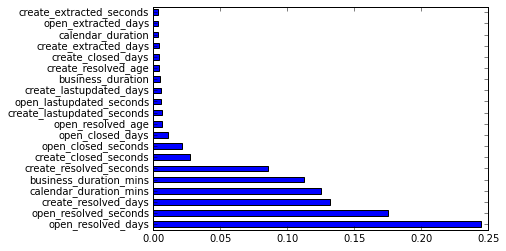

In [118]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [119]:
df['calendar_duration_mins'].unique()

array([    0.,  8526., 44388., ...,  5542., 26310., 70770.])

## Step Forward Feature Selection ##

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train.shape,X_test.shape

((304, 94), (77, 94))

In [123]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
sfs = SFS(LinearRegression(),forward=True,floating=False,verbose=2,scoring='neg_mean_squared_error',cv=3).fit(X_train_scaled,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    1.3s finished

[2022-03-30 20:24:47] Features: 1/1 -- score: -1.430408796486063e-25

In [125]:
sfs.k_feature_names_

('50', '65')

In [126]:
sfs.k_score_

-1.0921598932734251e-26

## High Category ##

In [293]:
dataframe_p2=dataframe_p2.drop(['number','sys_created_by','task_effective_number','sys_updated_by','opened_by','sys_created_on','caller_id','u_qs_reported_by','sys_id','activity_due','xtracted_on','diff_seconds','diff_seconds_1','sys_updated_on','opened_at','resolved_at','work_end','work_start','closed_at'],axis=1)

KeyError: "['number' 'sys_created_by' 'task_effective_number' 'sys_updated_by'\n 'opened_by' 'sys_created_on' 'caller_id' 'u_qs_reported_by' 'sys_id'\n 'activity_due' 'xtracted_on' 'diff_seconds' 'diff_seconds_1'\n 'sys_updated_on' 'opened_at' 'resolved_at' 'work_end' 'work_start'\n 'closed_at'] not found in axis"

In [241]:
dataframe_p2 = dataframe_p2.drop(['_index','_type','upon_reject','state','priority','sys_domain_path','u_qs_type','notify','sys_class_name','sla_due','u_escalation','escalation','upon_approval','u_sc_escalation','sys_domain','incident_state','severity','approval','account_prefix','account_name','account_domain','open_extracted_age','create_extracted_age'],axis=1)

In [242]:
## Splitting the dataframe based on training and testing ##
X2 = dataframe_p2[[i for i in list(dataframe_p2.columns) if i!='MTTR']]
y2 = dataframe_p2['MTTR']

In [243]:
## Split into train and test sets ##
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.33, random_state=1)

In [244]:
X_train_2.shape,X_test_2.shape, y_train_2.shape, y_test_2.shape

((2193, 94), (1081, 94), (2193,), (1081,))

In [245]:
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=['u_end_of_support','u_qs_opened_by_group','u_warranty_expired','cmdb_ci','impact','business_duration','service_offering','assigned_to','u_location_details','resolved_by','business_service','subcategory','close_code','assignment_group','calendar_duration','contact_type','urgency','u_preferred_language','company','u_cause','location','category','open_lastupdated_age','create_lastupdated_age','day_of_week_created','month_year_created','day_of_week_opened','month_year_opened','day_of_week_resolved','month_year_resolved','day_of_week_closed','month_year_closed','reopen_count_range','reassignment_count_range','open_resolved_age','create_resolved_age','open_closed_age','create_closed_age'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [246]:
X_train_2_new = encoder.fit_transform(X_train_2)
X_test_2_new = encoder.transform(X_test_2)

In [247]:
X_train_2_new.shape,X_test_2_new.shape

((2193, 4638), (1081, 4638))

In [248]:
X_train_2_new.columns[X_train_2_new.isna().any()].tolist()

[]

In [249]:
X_test_2_new.columns[X_test_2_new.isna().any()].tolist()

['u_qs_opened_by_group_No Group',
 'u_qs_opened_by_group_IBM-SD-India SD L1-Rail',
 'u_qs_opened_by_group_IBM-AP-Asset Management',
 'u_qs_opened_by_group_IBM-SD-Italy Turin SD L1-Rail',
 'u_qs_opened_by_group_IBM-MF-US-CONSOLE-OPS',
 'u_qs_opened_by_group_IBM-SD-IN',
 'u_qs_opened_by_group_IBM-SD-French-Aero',
 'u_qs_opened_by_group_IBM-SD-Italy Naples SD L1-Rail',
 'u_qs_opened_by_group_VEN-AP-SIMS-Rail',
 'u_qs_opened_by_group_IBM-SD-Spanish',
 'u_qs_opened_by_group_VEN-NTT-DS-Hemmersbach-Madrid-Staffed-ES-RAIL',
 'u_qs_opened_by_group_IBM-AP-COTS-Maximo-Rail',
 'u_qs_opened_by_group_APPR-BIS-APPL-CAB',
 'u_qs_opened_by_group_BA-IBM-DL-IMI-IN-Wintel',
 'u_qs_opened_by_group_IBM-AP-PDE CECC Projects-Aero',
 'u_qs_opened_by_group_IBM-AS-PKI Mgmt-Rail',
 'u_qs_opened_by_group_IBM-AP-ServiceNowAdmin-Rail',
 'u_qs_opened_by_group_BT-IBM-APPR-SAP-Basis-Rail',
 'u_qs_opened_by_group_BA-VEN-NTT-DS-Mirabel-MTL-AERO',
 'u_qs_opened_by_group_PC Refresh-IBM-SD-Naples-Rail',
 'u_qs_opened_by_gro

In [250]:

X_test_2_new = X_test_2_new.fillna(X_test_2_new.mean())

In [251]:
X_train_2_new.shape,X_test_2_new.shape

((2193, 4638), (1081, 4638))

In [252]:
X_train_2_new_scaled = scaler.fit_transform(X_train_2_new)
X_test_2_new_scaled = scaler.transform(X_test_2_new)

In [253]:
##regressor = LinearRegression()
regressor.fit(X_train_2_new_scaled,y_train_2)
print(regressor.score(X_test_2_new_scaled,y_test_2))
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred_high = regressor.predict(X_test_2_new_scaled)
data = pd.DataFrame({'Actual': y_test_2, 'Predicted': y_pred_high})
data

0.9516605462248854
83.83174145836068
[-2.47316380e-01  7.03890010e-03 -5.08504152e-01 ... -1.49595844e-01
  2.59339359e-01  8.75475971e+00]


Actual    Predicted
11391      3.843889    18.718790
91177     17.528333    23.957762
54488    570.809722   563.257507
43786      0.747778   -12.725027
33088      2.439167     2.051630
34241      3.363611    28.539760
87705      1.185000     1.358510
127335     1.509444     4.089353
126756   211.877500   195.641200
25725      1.011944     7.657085
13540      2.911944    -7.737761
62421      0.475278     0.556870
95452      0.823611   -10.674396
100973   242.442500   250.513217
70299    179.096111   186.481541
79148     10.315278     1.773062
4370       0.213056    -1.195451
111572     1.861389    -4.714921
5585     469.774722   465.041524
68754      0.424167     4.735499
47552      1.641944     4.441407
48767     50.920000    39.261506
77029      1.238056     7.605998
90884     41.703333    31.555768
42747    474.787500   489.051808
4252       4.977222    15.327710
77192      0.515833     9.105825
122025     0.875000    -4.937526
128909     0.830556     1.798733
47875      9.531667    10.694206
119110     2.111389     3.246787
113172     0.091389     5.279383
25592      0.706389     3.414847
68708      0.462778     7.856613
70295    176.931667   185.001316
100356    91.198056    97.564957
715       65.129722    60.280600
19293     11.975556   -18.383140
79110    178.842778   181.276637
79153     10.145556    13.551125
27660      4.319167     4.752771
77629      2.338611     2.655131
99046      0.796667    -6.201575
116168     7.254167    15.065822
10096      1.054444     5.434829
38587     46.728056    47.824409
79180      2.763889    11.340805
13126      1.096667     2.900715
89421      0.993056     2.624894
83327      0.227778     4.568431
9673       0.256944    -1.530261
71092      1.631667    10.807696
60406   3360.677778  3360.677778
97168      5.271667     0.045812
43984      0.879444    11.699238
124172    20.071389     9.460274
65457      0.628611     3.228525
28387      2.636111    20.589676
136436     0.300833    -5.487055
97164      1.510556     3.730334
25621      0.252500    -6.245323
8897       1.294167     2.188410
61497     77.884167    87.970265
70277     84.366111   103.176609
113164    21.787222    26.335747
125518     0.795278    -1.717376
101968     4.213611   -13.252346
23484      1.700278    -5.370637
814        1.059167    -0.506700
98231    120.435278    85.785851
74742      1.690833    11.609707
117816    24.820278    10.471474
19303     21.815833    30.301738
4429       0.528056     7.823992
105867     0.652222    12.806013
53225      2.091111     4.001563
4341     140.688056   151.040323
77943      0.433333     3.929714
65205     10.672500    16.888337
124026     3.295833     4.400158
22508      2.707500    -4.640998
78725    171.783056   178.984114
29761     33.583889    31.320616
126529   309.201111   339.769453
11465      2.042222     1.755316
76891      4.622222    34.927783
122011     0.507778     0.507778
11737     10.997222     8.658304
79146     10.237500     4.459280
98613     19.328889    15.042557
102736    25.911389    43.053694
64011      1.588611    -1.984360
134529     2.949722    -2.923933
77586      3.503333     2.711203
115599   127.669722   130.476916
33852      1.784167     8.996241
47550      1.642500     4.441962
18779      2.418889   -17.083425
83048      0.068889     9.990253
43879      0.610000    14.261008
33725     19.953611    27.757673
74352    172.829167    68.164051
96762      0.161667     3.206128
3326       0.232500    -0.175879
88259      2.263611     3.160565
95186     25.343889    27.690521
14562      0.417500    -9.851578
1947       0.314444    -7.321862
99882      0.706389     4.930029
12100     22.555000    17.738801
115247   192.975556   204.094853
37450     61.845000    61.217759
4606       0.315000    -4.301806
25402      1.492778     4.649538
125513     3.246944    -2.936433
97710     17.775000    23.229699
18527      5.573611     5.644727
1391       1.626389    11.191470
79145     10.246389     2.953655
93919      3.411111     0.618984
804        1.788611 

## Accuracy and Metrics Check ##

In [254]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_2,y_pred_high))
print("RMSE",np.sqrt(mean_squared_error(y_test_2,y_pred_high)))

MSE 9391.336817277845
RMSE 96.90890989624145


In [255]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test_2,y_pred_high))

MAE 12.361058867788751


In [256]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_2,y_pred_high)
print(r2)

0.9516605462248854


In [257]:
Adj_r2 = 1 - (1-r2_score(y_test_2, y_pred_high)) * (len(y2)-1)/(len(y2)-X2.shape[1]-1)
print(Adj_r2)

0.9502311946505347


In [258]:
 mean_absolute_percentage_error(y_test_2, y_pred_high)

965.5147514745547

C:\Users\000K1G744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MTTR'>

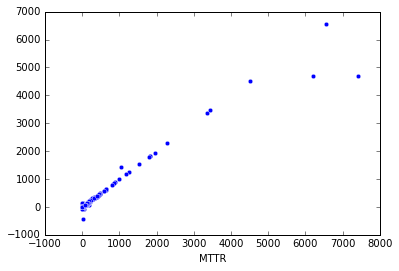

In [259]:
import matplotlib.pyplot as plt
sns.scatterplot(y_test_2, y_pred_high)

## Coefficient Interpretation ##

In [260]:
coefficent= regressor.coef_
absolute_coefficient = abs(regressor.coef_)

In [261]:
columns= X_train_2_new.columns
data = {'features': columns,'coefficient':coefficent,'absolute_coefficient':absolute_coefficient}

In [262]:
feature_importance = pd.DataFrame(data)

In [263]:
feature_importance = feature_importance.sort_values('absolute_coefficient',ascending=False)

In [264]:
feature_importance

features   coefficient  \
4508                              open_resolved_seconds  1.828461e+02   
4509                            create_resolved_seconds  1.825090e+02   
11           u_qs_opened_by_group_IBM-MF-US-CONSOLE-OPS -1.305573e+01   
163                                     cmdb_ci_ifm0046  8.980355e+00   
4632                             open_closed_age_No age  8.864529e+00   
1215                                             active  8.789758e+00   
1311                          business_duration_Unknown  8.776047e+00   
4637                        create_closed_age_No Closed  8.754760e+00   
2147  u_location_details_200 Côte-Vertu West,  Montr...  8.730091e+00   
2641                            resolved_by_No Resolved  8.729905e+00   
2961                                 close_code_Unknown  8.729905e+00   
4627                        create_resolved_age_Unknown  8.729905e+00   
4592                         day_of_week_closed_Unknown  8.729905e+00   
4570                       day_of_week_resolved_Unknown  8.729905e+00   
3399                          calendar_duration_Unknown  8.729905e+00   
4621                          open_resolved_age_Unknown  8.729905e+00   
297                                     cmdb_ci_case004 -7.684412e+00   
310                        cmdb_ci_BNET Employee Portal  4.748712e+00   
2970             assignment_group_BT-IBM-AP-Domino-Rail  4.387407e+00   
3358        calendar_duration_1 Day 12 Hours 46 Minutes -3.654766e+00   
1299              business_duration_14 Hours 55 Minutes -3.624455e+00   
3385        calendar_duration_1 Day 18 Hours 39 Minutes  3.624100e+00   
4367                        location_556 - Montreal CGI  3.595102e+00   
157                                    cmdb_ci_P2117283  3.552701e+00   
461                                  cmdb_ci_bbtfwdchn1  3.493793e+00   
1420               business_duration_2 Hours 13 Minutes -3.421924e+00   
587                                    cmdb_ci_P2175853  3.063754e+00   
583                                  cmdb_ci_Amerls2006  2.875834e+00   
3349       calendar_duration_5 Days 23 Hours 26 Minutes  2.835888e+00   
2980        assignment_group_BA-IBM-DL-IMI-IN-Unix-Aero  2.706805e+00   
3256              calendar_duration_10 Hours 37 Minutes -2.619465e+00   
151                cmdb_ci_BBTAPTTH15.bt.bombardier.net -2.557373e+00   
202                               cmdb_ci_bsevst00wap03  2.516413e+00   
1270                 business_duration_7 Hours 1 Minute -2.507913e+00   
3301         calendar_duration_1 Day 8 Hours 25 Minutes -2.430802e+00   
2509  resolved_by_Intekhab ALAM (Bombardier - Transp... -2.300252e+00   
330   cmdb_ci_McAfee Endpoint Protection, Advanced S... -2.192446e+00   
4578                       month_year_resolved_Apr 2021 -2.159674e+00   
2636               resolved_by_Rituparna Mitra (IBM-BA)  2.142028e+00   
259                                     cmdb_ci_ifm0216 -2.134851e+00   
1225                   business_duration_1 Day 16 Hours  2.071189e+00   
1663          assigned_to_Haridoss Sithambaram (IBM-BA)  1.881770e+00   
1632  service_offering_Production Performance and Mo...  1.880510e+00   
4258                          u_cause_Server - Hardware  1.865006e+00   
2889              business_service_Production - Control  1.865006e+00   
3149              calendar_duration_19 Hours 29 Minutes  1.865006e+00   
2032                u_location_details_Witchita, Kansas  1.864698e+00   
870                                cmdb_ci_BBTSRVBPT016  1.861387e+00   
227                               cmdb_ci_bcasbo01swa00  1.828519e+00   
3017  assignment_group_VEN-ATT-Integration-Telephony...  1.783974e+00   
1221                    business_duration_1 Day 8 Hours -1.782309e+00   
3528       calendar_duration_5 Days 23 Hours 25 Minutes  1.690879e+00   
260                      cmdb_ci_Alstom -APP Office 365  1.579137e+00   
3641               calendar_duration_8 Hours 58 Minutes  1.578386e+00   
199                             

In [265]:
top_20 = feature_importance.head(30)

In [266]:
top_20

features  coefficient  \
4508                              open_resolved_seconds   182.846055   
4509                            create_resolved_seconds   182.509036   
11           u_qs_opened_by_group_IBM-MF-US-CONSOLE-OPS   -13.055730   
163                                     cmdb_ci_ifm0046     8.980355   
4632                             open_closed_age_No age     8.864529   
1215                                             active     8.789758   
1311                          business_duration_Unknown     8.776047   
4637                        create_closed_age_No Closed     8.754760   
2147  u_location_details_200 Côte-Vertu West,  Montr...     8.730091   
2641                            resolved_by_No Resolved     8.729905   
2961                                 close_code_Unknown     8.729905   
4627                        create_resolved_age_Unknown     8.729905   
4592                         day_of_week_closed_Unknown     8.729905   
4570                       day_of_week_resolved_Unknown     8.729905   
3399                          calendar_duration_Unknown     8.729905   
4621                          open_resolved_age_Unknown     8.729905   
297                                     cmdb_ci_case004    -7.684412   
310                        cmdb_ci_BNET Employee Portal     4.748712   
2970             assignment_group_BT-IBM-AP-Domino-Rail     4.387407   
3358        calendar_duration_1 Day 12 Hours 46 Minutes    -3.654766   
1299              business_duration_14 Hours 55 Minutes    -3.624455   
3385        calendar_duration_1 Day 18 Hours 39 Minutes     3.624100   
4367                        location_556 - Montreal CGI     3.595102   
157                                    cmdb_ci_P2117283     3.552701   
461                                  cmdb_ci_bbtfwdchn1     3.493793   
1420               business_duration_2 Hours 13 Minutes    -3.421924   
587                                    cmdb_ci_P2175853     3.063754   
583                                  cmdb_ci_Amerls2006     2.875834   
3349       calendar_duration_5 Days 23 Hours 26 Minutes     2.835888   
2980        assignment_group_BA-IBM-DL-IMI-IN-Unix-Aero     2.706805   

      absolute_coefficient  
4508            182.846055  
4509            182.509036  
11               13.055730  
163               8.980355  
4632              8.864529  
1215              8.789758  
1311              8.776047  
4637              8.754760  
2147              8.730091  
2641              8.729905  
2961              8.729905  
4627              8.729905  
4592              8.729905  
4570              8.729905  
3399              8.729905  
4621              8.729905  
297               7.684412  
310               4.748712  
2970              4.387407  
3358              3.654766  
1299              3.624455  
3385              3.624100  
4367              3.595102  
157               3.552701  
461               3.493793  
1420              3.421924  
587               3.063754  
583               2.875834  
3349              2.835888  
2980              2.706805

In [267]:
top_20.index=top_20['features']

<AxesSubplot:xlabel='features'>

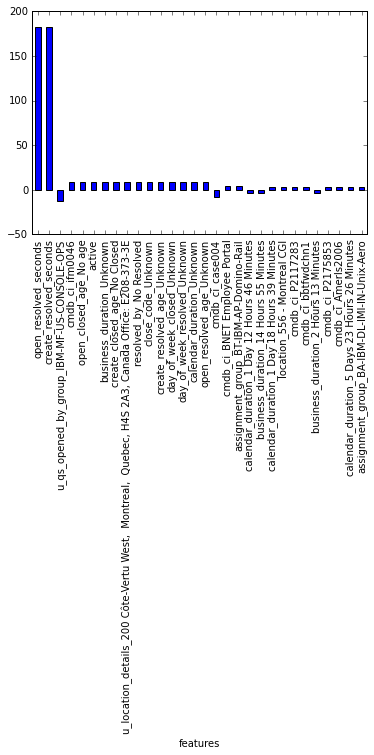

In [268]:
top_20['coefficient'].plot(kind='bar')

## Principal Component Analysis ##

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [132]:
X = dataframe_p1_ordinal.iloc[:,:-1]
y = dataframe_p1_ordinal[['MTTR']]

In [133]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))


In [134]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 24.22,  32.2 ,  38.92,  43.69,  47.92,  51.34,  54.5 ,  57.5 ,
        60.42,  62.86,  65.14,  67.3 ,  69.26,  71.07,  72.84,  74.4 ,
        75.89,  77.31,  78.64,  79.9 ,  81.14,  82.38,  83.54,  84.64,
        85.7 ,  86.72,  87.71,  88.66,  89.54,  90.41,  91.19,  91.92,
        92.63,  93.3 ,  93.94,  94.57,  95.11,  95.65,  96.16,  96.64,
        97.08,  97.51,  97.87,  98.2 ,  98.52,  98.81,  99.06,  99.27,
        99.44,  99.61,  99.74,  99.85,  99.92,  99.96,  99.99, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01])

In [135]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [136]:
regr = LinearRegression()
mse = []

In [137]:
# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

In [320]:
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'MTTR')

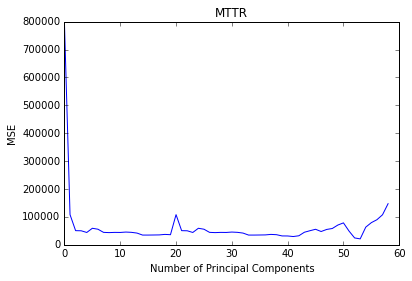

In [321]:
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('MTTR')

In [322]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([23.91, 31.98, 39.12, 44.21, 48.64, 52.09, 55.36, 58.39, 61.27,
       63.98, 66.25, 68.34, 70.33, 72.22, 73.95, 75.54, 77.05, 78.51,
       79.88, 81.16, 82.39, 83.57, 84.71, 85.83, 86.87])

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [149]:
pca = PCA(n_components=60)

In [150]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [151]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression()

In [152]:
#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

328.1627508895262

In [153]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)
print(r2)

0.8469773001227191


# Medium Category ##

In [158]:
dataframe_p3=dataframe_p3.drop(['number','sys_created_by','task_effective_number','sys_updated_by','opened_by','sys_created_on','caller_id','u_qs_reported_by','sys_id','activity_due','xtracted_on','diff_seconds','diff_seconds_1','sys_updated_on','opened_at','resolved_at','work_end','work_start','closed_at'],axis=1)

In [159]:
dataframe_p3 = dataframe_p3.drop(['_index','_type','upon_reject','state','priority','sys_domain_path','u_qs_type','notify','sys_class_name','sla_due','u_escalation','escalation','upon_approval','u_sc_escalation','sys_domain','incident_state','severity','approval','account_prefix','account_name','account_domain','open_extracted_age','create_extracted_age'],axis=1)

In [160]:
## Splitting the dataframe based on training and testing ##
X3 = dataframe_p3[[i for i in list(dataframe_p3.columns) if i!='MTTR']]
y3 = dataframe_p3['MTTR']

In [161]:
## Split into train and test sets ##
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.33, random_state=1)

In [162]:
X_train_3.shape,X_test_3.shape, y_train_3.shape, y_test_3.shape

((23329, 94), (11491, 94), (23329,), (11491,))

In [163]:
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=['u_end_of_support','u_qs_opened_by_group','u_warranty_expired','cmdb_ci','impact','business_duration','service_offering','assigned_to','u_location_details','resolved_by','business_service','subcategory','close_code','assignment_group','calendar_duration','contact_type','urgency','u_preferred_language','company','u_cause','location','category','open_lastupdated_age','create_lastupdated_age','day_of_week_created','month_year_created','day_of_week_opened','month_year_opened','day_of_week_resolved','month_year_resolved','day_of_week_closed','month_year_closed','reopen_count_range','reassignment_count_range','open_resolved_age','create_resolved_age','open_closed_age','create_closed_age'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [164]:
X_train_3_new = encoder.fit_transform(X_train_3)
X_test_3_new = encoder.transform(X_test_3)

In [165]:
X_train_3_new.columns[X_train_3_new.isna().any()].tolist()

[]

In [166]:
X_test_3_new.columns[X_test_3_new.isna().any()].tolist()

['u_qs_opened_by_group_No Group',
 'u_qs_opened_by_group_IBM-AP-Domino-AERO',
 'u_qs_opened_by_group_IBM-SD-Italy Turin SD L1-Rail',
 'u_qs_opened_by_group_IBM-SD-India SD L1-Rail',
 'u_qs_opened_by_group_IBM-SD-IN',
 'u_qs_opened_by_group_IBM-SD-Spanish',
 'u_qs_opened_by_group_IBM-SD-French-Aero',
 'u_qs_opened_by_group_APPR-BIS-APPL-CAB',
 'u_qs_opened_by_group_IBM-SD-Italy Naples SD L1-Rail',
 'u_qs_opened_by_group_BT-IBM-APPR-SAP-Basis-Rail',
 'u_qs_opened_by_group_IBM-AP-COTS-Maximo-Rail',
 'u_qs_opened_by_group_IBM-AP-Backup-Rail',
 'u_qs_opened_by_group_IBM-AP-PDE IT-Aero',
 'u_qs_opened_by_group_IBM-AP-PDE-IBM Applications-Rail',
 'u_qs_opened_by_group_IBM-AP-Asset Management',
 'u_qs_opened_by_group_BIS-AP-BBA Portal Support',
 'u_qs_opened_by_group_VEN-NTT-DS-Hemmersbach-Madrid-Staffed-ES-RAIL',
 'u_qs_opened_by_group_BA-CSALP-Digital Data & Application Services-Aero',
 'u_qs_opened_by_group_BT-IBM-SI-Asset Governance-Rail',
 'u_qs_opened_by_group_IBM-AP-COTS TDM-Aero',
 'u_

In [169]:
X_test_3_new = X_test_3_new.fillna(X_test_3_new.mean())

In [170]:
X_train_3_new.shape, X_test_3_new.shape

((23329, 18966), (11491, 18966))

In [171]:
X_train_3_new_scaled = scaler.fit_transform(X_train_3_new)
X_test_3_new_scaled = scaler.transform(X_test_3_new)

In [ ]:
##regressor = LinearRegression()
regressor.fit(X_train_3_new_scaled,y_train_3)
print(regressor.score(X_test_3_new_scaled,y_test_3))
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred_medium = regressor.predict(X_test_3_new_scaled)
data = pd.DataFrame({'Actual': y_test_3, 'Predicted': y_pred_medium})
data